In [1]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn
from pylab import cm
import matplotlib.pyplot as plt
import src.Network as net
import sys
import time
import hist
import scipy.stats
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
%matplotlib notebook

import mplhep as hep

# Make plots look more HEP-like
plt.style.use(hep.style.ROOT)

In [3]:
fileName="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta2_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225819/0000/ntuples.root"
fileNameDelta2p5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta2p5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225832/0000/ntuples.root"
fileNameDelta3="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta3_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225846/0000/ntuples.root"
fileNameDelta5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225928/0000/ntuples.root"
fileNameE50Delta2="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta2_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225716/0000/ntuples.root"
fileNameE50Delta2p5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta2p5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225726/0000/ntuples.root"
fileNameE50Delta3="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta3_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225737/0000/ntuples.root"
fileNameE50Delta5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225808/0000/ntuples.root"
fileNameE25Delta2="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E25Eta1p62Delta2_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225611/0000/ntuples.root"
fileNameE25Delta2p5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E25Eta1p62Delta2p5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225623/0000/ntuples.root"
fileNameE25Delta3="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E25Eta1p62Delta3_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225633/0000/ntuples.root"
fileNameE25Delta5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E25Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225704/0000/ntuples.root"

fileE100Delta2=uproot.open(fileName)
fileE100Delta2p5=uproot.open(fileNameDelta2p5)
fileE100Delta3=uproot.open(fileNameDelta3)
fileE100Delta5=uproot.open(fileNameDelta5)

fileE50Delta2=uproot.open(fileNameE50Delta2)
fileE50Delta2p5=uproot.open(fileNameE50Delta2p5)
fileE50Delta3=uproot.open(fileNameE50Delta3)
fileE50Delta5=uproot.open(fileNameE50Delta5)

fileE25Delta2=uproot.open(fileNameE25Delta2)
fileE25Delta2p5=uproot.open(fileNameE25Delta2p5)
fileE25Delta3=uproot.open(fileNameE25Delta3)
fileE25Delta5=uproot.open(fileNameE25Delta5)

In [4]:
trackstersE100D2=fileE100Delta2["ana/tracksters"]
trackstersE100D2p5=fileE100Delta2p5["ana/tracksters"]
trackstersE100D3=fileE100Delta3["ana/tracksters"]
trackstersE100D5=fileE100Delta5["ana/tracksters"]

trackstersE50D2=fileE50Delta2["ana/tracksters"]
trackstersE50D5=fileE50Delta5["ana/tracksters"]
trackstersE50D2p5=fileE50Delta2p5["ana/tracksters"]
trackstersE50D3=fileE50Delta3["ana/tracksters"]

trackstersE25D2=fileE25Delta2["ana/tracksters"]
trackstersE25D5=fileE25Delta5["ana/tracksters"]
trackstersE25D2p5=fileE25Delta2p5["ana/tracksters"]
trackstersE25D3=fileE25Delta3["ana/tracksters"]

In [5]:
tracksters=file["ana/tracksters"]
vertices_E = tracksters['vertices_energy'].array()
vertices_indexes = tracksters['vertices_indexes'].array()
vertices_x = tracksters['vertices_x'].array()
vertices_y = tracksters['vertices_y'].array()
vertices_z = tracksters['vertices_z'].array()
hitsD2_x = tracksters['recHits_x'].array()
hitsD2_y = tracksters['recHits_y'].array()
hitsD2_z = tracksters['recHits_z'].array()
vertices_layers=tracksters['vertices_layer'].array()
trackster_E=tracksters['raw_energy'].array()
trackster_phi=tracksters['trackster_barycenter_phi'].array()
trackster_eta=tracksters['trackster_barycenter_eta'].array()
"""
trackstersD2p5=fileDelta2p5["ana/tracksters"]
verticesD2p5_E = trackstersD2p5['vertices_energy'].array()
verticesD2p5_indexes = trackstersD2p5['vertices_indexes'].array()
verticesD2p5_x = trackstersD2p5['vertices_x'].array()
verticesD2p5_y = trackstersD2p5['vertices_y'].array()
verticesD2p5_z = trackstersD2p5['vertices_z'].array()
verticesD2p5_layers=trackstersD2p5['vertices_layer'].array()
tracksterD2p5_E=trackstersD2p5['raw_energy'].array()
tracksterD2p5_EReg=trackstersD2p5['regressed_energy'].array()
tracksterD2p5_phi=trackstersD2p5['trackster_barycenter_phi'].array()
tracksterD2p5_eta=trackstersD2p5['trackster_barycenter_eta'].array()

trackstersD3=fileDelta3["ana/tracksters"]
verticesD3_E = trackstersD3['vertices_energy'].array()
verticesD3_indexes = trackstersD3['vertices_indexes'].array()
tracksterD3_E=trackstersD3['raw_energy'].array()
"""

trackstersD5=fileDelta5["ana/tracksters"]
verticesD5_E = trackstersD5['vertices_energy'].array()
verticesD5_indexes = trackstersD5['vertices_indexes'].array()
verticesD5_x = trackstersD5['vertices_x'].array()
verticesD5_y = trackstersD5['vertices_y'].array()
verticesD5_z = trackstersD5['vertices_z'].array()
hitsD5_x = trackstersD5['recHits_x'].array()
hitsD5_y = trackstersD5['recHits_y'].array()
hitsD5_z = trackstersD5['recHits_z'].array()
hitsD5_E = trackstersD5['recHits_energy'].array()
verticesD5_layers=trackstersD5['vertices_layer'].array()
tracksterD5_E=trackstersD5['raw_energy'].array()
tracksterD5_EReg=trackstersD5['regressed_energy'].array()
tracksterD5_phi=trackstersD5['trackster_barycenter_phi'].array()
tracksterD5_eta=trackstersD5['trackster_barycenter_eta'].array()

trackstersE50D2=fileE50Delta2["ana/tracksters"]
verticesE50D2_E = trackstersE50D2['vertices_energy'].array()
verticesE50D2_indexes = trackstersE50D2['vertices_indexes'].array()
tracksterE50D2_E=trackstersE50D2['raw_energy'].array()
verticesE50D2_x = trackstersE50D2['vertices_x'].array()
verticesE50D2_y = trackstersE50D2['vertices_y'].array()
verticesE50D2_z = trackstersE50D2['vertices_z'].array()
hitsE50D2_x = trackstersE50D2['recHits_x'].array()
hitsE50D2_y = trackstersE50D2['recHits_y'].array()
hitsE50D2_z = trackstersE50D2['recHits_z'].array()
hitsE50D2_E = trackstersE50D2['recHits_energy'].array()
#vertices_layers=tracksters['vertices_layer'].array()
tracksterE50D2_phi=trackstersE50D2['trackster_barycenter_phi'].array()
tracksterE50D2_eta=trackstersE50D2['trackster_barycenter_eta'].array()

trackstersE50D5=fileE50Delta5["ana/tracksters"]
verticesE50D5_E = trackstersE50D5['vertices_energy'].array()
verticesE50D5_indexes = trackstersE50D5['vertices_indexes'].array()
tracksterE50D5_E=trackstersE50D5['raw_energy'].array()


NameError: name 'file' is not defined

In [69]:
tracksters.keys()

['event',
 'NClusters',
 'NTracksters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'trackster_barycenter_eta',
 'trackster_barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity',
 'vertices_layer',
 'recHits_indexes',
 'recHits_x',
 'recHits_y',
 'recHits_z',
 'recHits_energy',
 'recHits_waferU',
 'recHits_waferV',
 'recHits_cellU',
 'recHits_cellV',
 'layer_cluster_seed']

In [6]:
def delta_Eta(vertices_x,vertices_y,vertices_z):
    theta=np.arctan(np.sqrt(vertices_x**2+vertices_y**2)/vertices_z)
    #print(theta)
    #print(np.tan(theta/2))
    eta=-np.log(np.tan(theta/2))
    #print(eta)
    return eta

def delta_Phi(vertices_x,vertices_y):
    phi=np.arctan2(vertices_y,vertices_x)
    
    return phi

def delta_eta_phi(vertices_x,vertices_y,vertices_z,barycenter_eta,barycenter_phi):
    Phi=delta_Phi(vertices_x,vertices_y)
    Eta=delta_Eta(vertices_x,vertices_y,vertices_z)
    dR=np.sqrt((Eta-barycenter_eta)**2+(Phi-barycenter_phi)**2)
    #barycenter_R=np.sqrt(barycenter_eta**2+barycenter_phi**2)
    return np.mean(dR)

def delta_eta_phi_EW(vertices_x,vertices_y,vertices_z,barycenter_eta,barycenter_phi,vertices_E):
    Phi=delta_Phi(vertices_x,vertices_y)
    Eta=delta_Eta(vertices_x,vertices_y,vertices_z)
    dR=np.sqrt((Eta-barycenter_eta)**2+(Phi-barycenter_phi)**2)
    #barycenter_R=np.sqrt(barycenter_eta**2+barycenter_phi**2)
    return np.mean(dR*vertices_E)/sum(vertices_E)

In [105]:
D5ShowerShapes=[]
D5LongestPaths=[]
D5LongestPathsFirstNode=[]
D5CenParams=[]


N = len(verticesD5_indexes)
#N_tr=10000
print(N)

for evt in range(N):
    for tr in range(min(len(verticesD5_indexes[evt]),2)):
        v_layers=verticesD5_layers[evt][tr]
        v_ind=verticesD5_indexes[evt][tr]
        v_x=verticesD5_x[evt][tr]
        v_y=verticesD5_y[evt][tr]
        v_z=verticesD5_z[evt][tr]
        v_E=verticesD5_E[evt][tr] 
        
        h_x=hitsD5_x[evt][tr]
        h_y=hitsD5_y[evt][tr]
        h_z=hitsD5_z[evt][tr]
        h_E=hitsD5_E[evt][tr] 
        
        if(sum(v_E)<2):
            continue
        edges_1 = fn.edgeBuilderNew(
            v_ind,
            v_x, 
            v_y, 
            v_z, 
            v_E,
            1
        )
        edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
        
        #c_nxkatz_undir=fn.nXCentralityKatz(v_ind,edges_1,False)
        c_nxpr_undir=fn.nXCentralityPageRank(v_ind,edges_1,True)
        centrality=c_nxpr_undir
        D5LongestPaths.append([fn.longestPathSource(v_ind,edges_1,centrality),fn.longestPathSource(v_ind,edges_1,centrality,True)])

        D5LongestPathsFirstNode.append([fn.longestPathInitialNode(v_ind,edges_1),fn.longestPathInitialNode(v_ind,edges_1,True)])

        D5CenParams.append([np.mean(centrality),np.std(centrality)
                         ,scipy.stats.skew(centrality),scipy.stats.kurtosis(centrality)])

        D5ShowerShapes.append([
            fn.ld(v_z,v_E),
            fn.sd(v_z,v_E),
            fn.delta_R(v_x,v_y,v_z,v_E),
            fn.delta_RT(v_x,v_y,v_E),
            fn.delta_RT(v_x,v_y,v_E,True),
            ak.sum(v_E),
            fn.maxE_z(v_z,v_E),
            fn.maxAbsZ(v_z),
            fn.delta_RT_std(v_x,v_y,v_E)
            ,delta_eta_phi(v_x,v_y,v_z,tracksterD5_eta[evt,tr],tracksterD5_phi[evt,tr])
            ,delta_eta_phi_EW(v_x,v_y,v_z,tracksterD5_eta[evt,tr],tracksterD5_phi[evt,tr],v_E)
            ,delta_eta_phi(h_x,h_y,h_z,tracksterD5_eta[evt,tr],tracksterD5_phi[evt,tr])
            ,delta_eta_phi_EW(h_x,h_y,h_z,tracksterD5_eta[evt,tr],tracksterD5_phi[evt,tr],h_E)
        ])



500


In [106]:

D2ShowerShapes=[]
D2CenParams=[]
D2LongestPathsFirstNode=[]
D2LongestPaths=[]

N = len(verticesE50D2_indexes)

for evt in range(N):
    for tr in range(min(len(verticesE50D2_indexes[evt]),2)):
        v_ind_inc=verticesE50D2_indexes[evt,tr]
        v_x_inc=verticesE50D2_x[evt,tr]
        v_y_inc=verticesE50D2_y[evt,tr]
        v_z_inc=verticesE50D2_z[evt,tr]
        v_E_inc=verticesE50D2_E[evt,tr]
        h_x=hitsE50D2_x[evt][tr]
        h_y=hitsE50D2_y[evt][tr]
        h_z=hitsE50D2_z[evt][tr]
        h_E=hitsE50D2_E[evt][tr]
        #print(v_E_inc)
        if(len(v_ind_inc)<2):
            continue
        if(sum(v_E_inc)<20):
            continue

        edges_1 = fn.edgeBuilderNew(
            v_ind_inc,
            v_x_inc, 
            v_y_inc, 
            v_z_inc,
            v_E_inc,
            1
        )
        edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
        
        #c_nxkatz_undir=fn.nXCentralityKatz(v_ind_inc,edges_1,False)
        c_nxpr_undir=fn.nXCentralityPageRank(v_ind_inc,edges_1,True)
        centrality=c_nxpr_undir
        #print(centrality)
        D2LongestPaths.append([fn.longestPathSource(v_ind_inc,edges_1,centrality),fn.longestPathSource(v_ind_inc,edges_1,centrality,True)])

        D2LongestPathsFirstNode.append([fn.longestPathInitialNode(v_ind_inc,edges_1),fn.longestPathInitialNode(v_ind_inc,edges_1,True)])

        D2CenParams.append([np.mean(centrality),np.std(centrality)
                         ,scipy.stats.skew(centrality),scipy.stats.kurtosis(centrality)])
        #print(D2CenParams[-1])
        D2ShowerShapes.append([
            fn.ld(v_z_inc,v_E_inc),
            fn.sd(v_z_inc,v_E_inc),
            fn.delta_R(v_x_inc,v_y_inc,v_z_inc,v_E_inc),
            fn.delta_RT(v_x_inc,v_y_inc,v_E_inc),
            fn.delta_RT(v_x_inc,v_y_inc,v_E_inc,True),
            ak.sum(v_E_inc),
            fn.maxE_z(v_z_inc,v_E_inc),
            fn.maxAbsZ(v_z_inc),
            fn.delta_RT_std(v_x_inc,v_y_inc,v_E_inc)
            ,delta_eta_phi(v_x_inc,v_y_inc,v_z_inc,tracksterE50D2_eta[evt,tr],tracksterE50D2_phi[evt,tr])
            ,delta_eta_phi_EW(v_x_inc,v_y_inc,v_z_inc,tracksterE50D2_eta[evt,tr],tracksterE50D2_phi[evt,tr],v_E_inc)
            ,delta_eta_phi(h_x,h_y,h_z,tracksterE50D2_eta[evt,tr],tracksterE50D2_phi[evt,tr])
            ,delta_eta_phi_EW(h_x,h_y,h_z,tracksterE50D2_eta[evt,tr],tracksterE50D2_phi[evt,tr],h_E)
        ])



In [107]:
D5ShowerShapes=np.asarray(D5ShowerShapes)
D2ShowerShapes=np.asarray(D2ShowerShapes)
D5LongestPaths=np.asarray(D5LongestPaths)
D2LongestPaths=np.asarray(D2LongestPaths)
D5LongestPathsFirstNode=np.asarray(D5LongestPathsFirstNode)
D2LongestPathsFirstNode=np.asarray(D2LongestPathsFirstNode)
D5CenParams=np.asarray(D5CenParams)
D2CenParams=np.asarray(D2CenParams)

In [101]:
def plotShowerShapes(completeShowerShapes,incompleteShowerShapes,xlabels,saveFileNames,bins=50):
    %matplotlib inline
    for i in range(len(completeShowerShapes[0])):
        plt.figure(figsize=(8,6))
        plt.hist(completeShowerShapes[:,i], histtype="step",bins=bins, color='b',label='D5')
        plt.hist(incompleteShowerShapes[:,i], histtype="step",bins=bins, color='r',label='D2')
        plt.legend(fontsize=20)
        plt.ylabel("N",fontsize=20)
        plt.xlabel(xlabels[i],fontsize=20)
        #plt.title(datasetName,fontsize=20)
        #plt.xlim(min(completeShowerShapes[:,i]-5),max(completeShowerShapes[:,i]+5))
        #if(savefigs):
        #    plt.savefig("figures/"+folder+"/"+saveFileNames[i]+".png")
        plt.show()

In [62]:
print(np.sum(np.isnan(D2ShowerShapes)))

30


['incVsCom_ld', 'incVsCom_sd', 'incVsCom_delta_R', 'incVsCom_delta_RT', 'incVsCom_delta_RT_Eweighted', 'incVsCom_Total_energy', 'incVsCom_maxE_Z_position', 'incVsCom_maxium_Z_position', 'incVsCom_delta_R_std', 'incVsCom_delta_eta_phi']


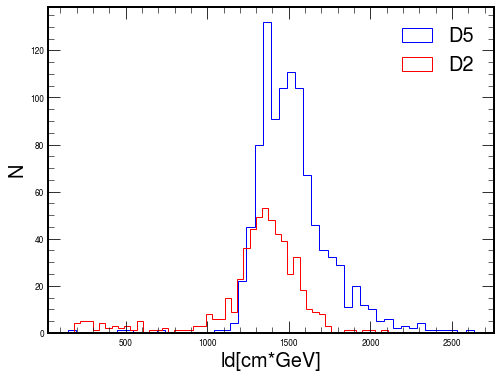

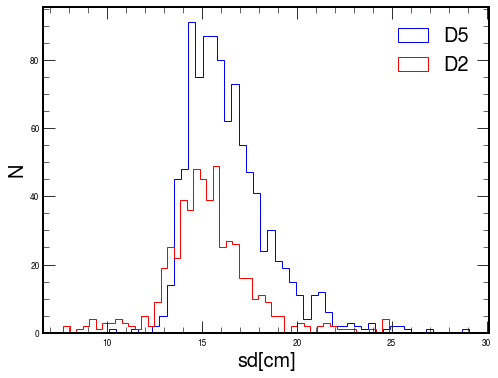

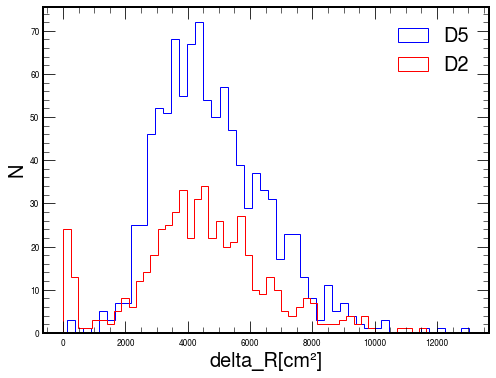

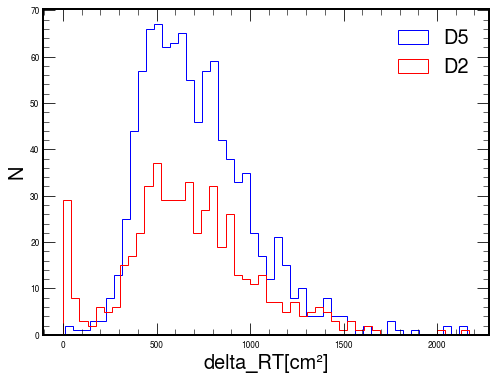

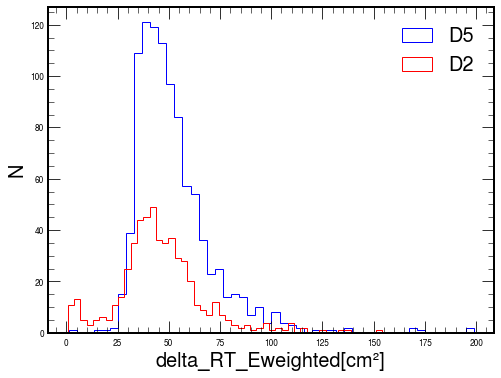

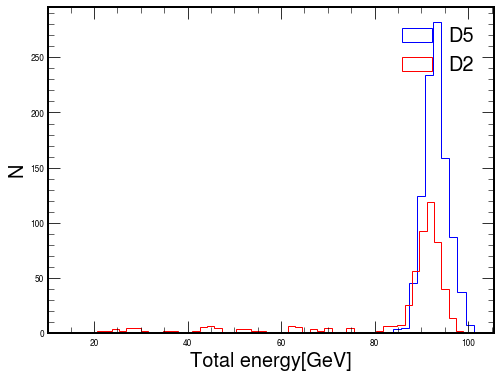

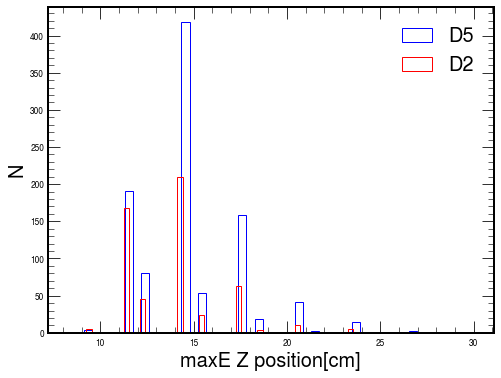

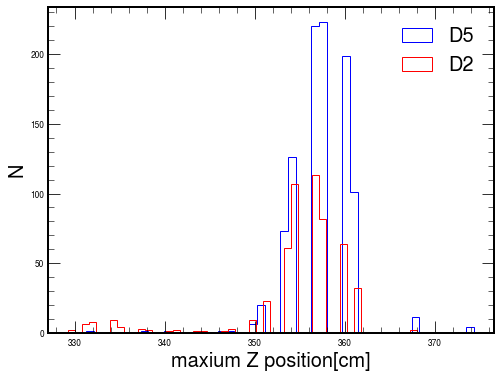

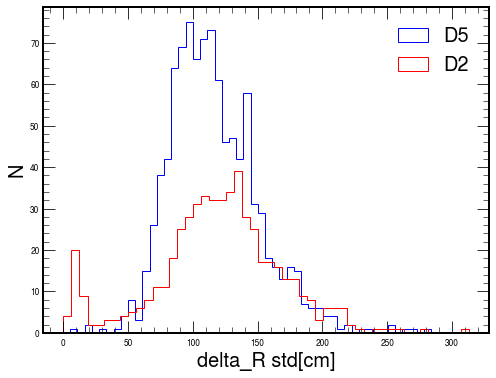

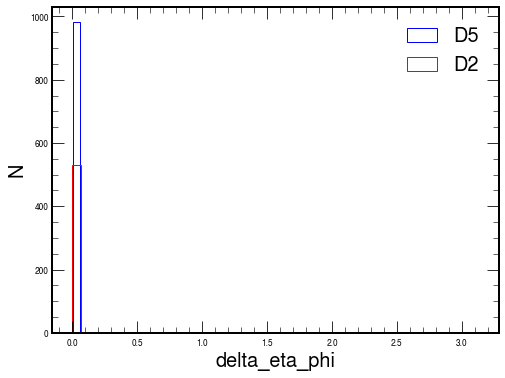

IndexError: list index out of range

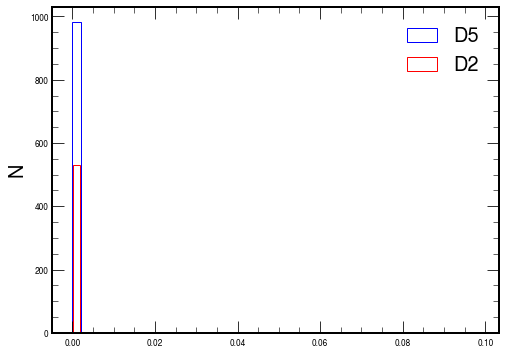

In [102]:
xlabels=["ld[cm*GeV]","sd[cm]","delta_R[cm²]","delta_RT[cm²]","delta_RT_Eweighted[cm²]","Total energy[GeV]","maxE Z position[cm]","maxium Z position[cm]","delta_R std[cm]","delta_eta_phi"]
xlabels2=["ld","sd","delta_R","delta_RT","delta_RT_Eweighted","Total energy","maxE Z position","maxium Z position","delta_R std","delta_eta_phi"]

newList=[("incVsCom_"+i.replace(" ","_")) for i in xlabels2]
print(newList)
#if not os.path.isdir("figures/"+folder):
#    os.makedirs("figures/"+folder)
plotShowerShapes(D5ShowerShapes,D2ShowerShapes,xlabels,newList)

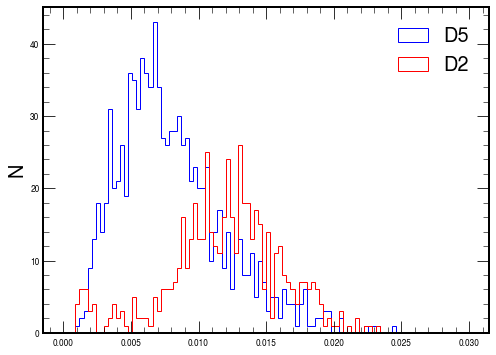

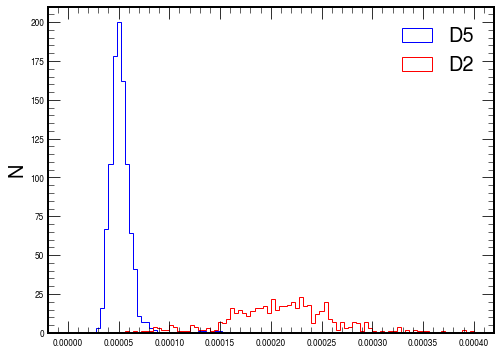

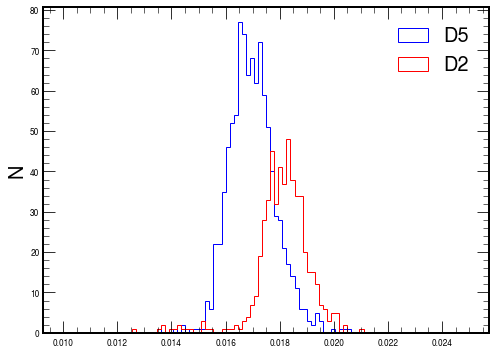

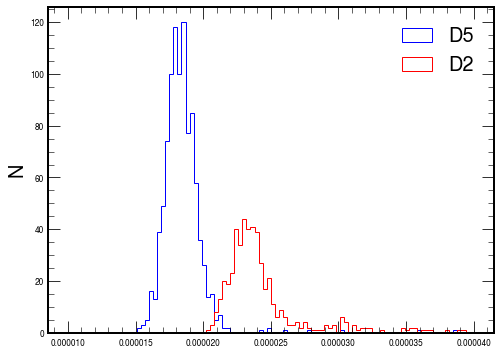

In [109]:
plt.figure(figsize=(8,6))
plt.hist(D5ShowerShapes[:,-4], histtype="step",bins=100,range=(0,0.03), color='b',label='D5')
plt.hist(D2ShowerShapes[:,-4], histtype="step",bins=100,range=(0,0.03), color='r',label='D2')
plt.legend(fontsize=20)
plt.ylabel("N",fontsize=20)
#plt.xlabel(xlabels[i],fontsize=20)
#plt.title(datasetName,fontsize=20)
#plt.xlim(min(completeShowerShapes[:,i]-5),max(completeShowerShapes[:,i]+5))
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+saveFileNames[i]+".png")
plt.show()

plt.figure(figsize=(8,6))
plt.hist(D5ShowerShapes[:,-3], histtype="step",bins=100,range=(0,0.0004), color='b',label='D5')
plt.hist(D2ShowerShapes[:,-3], histtype="step",bins=100,range=(0,0.0004), color='r',label='D2')
plt.legend(fontsize=20)
plt.ylabel("N",fontsize=20)
#plt.xlabel(xlabels[i],fontsize=20)
#plt.title(datasetName,fontsize=20)
#plt.xlim(min(completeShowerShapes[:,i]-5),max(completeShowerShapes[:,i]+5))
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+saveFileNames[i]+".png")
plt.show()

plt.figure(figsize=(8,6))
plt.hist(D5ShowerShapes[:,-2], histtype="step",bins=100,range=(0.01,0.025), color='b',label='D5')
plt.hist(D2ShowerShapes[:,-2], histtype="step",bins=100,range=(0.01,0.025), color='r',label='D2')
plt.legend(fontsize=20)
plt.ylabel("N",fontsize=20)
#plt.xlabel(xlabels[i],fontsize=20)
#plt.title(datasetName,fontsize=20)
#plt.xlim(min(completeShowerShapes[:,i]-5),max(completeShowerShapes[:,i]+5))
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+saveFileNames[i]+".png")
plt.show()

plt.figure(figsize=(8,6))
plt.hist(D5ShowerShapes[:,-1], histtype="step",bins=100,range=(0.00001,0.00004), color='b',label='D5')
plt.hist(D2ShowerShapes[:,-1], histtype="step",bins=100,range=(0.00001,0.00004), color='r',label='D2')
plt.legend(fontsize=20)
plt.ylabel("N",fontsize=20)
#plt.xlabel(xlabels[i],fontsize=20)
#plt.title(datasetName,fontsize=20)
#plt.xlim(min(completeShowerShapes[:,i]-5),max(completeShowerShapes[:,i]+5))
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+saveFileNames[i]+".png")
plt.show()

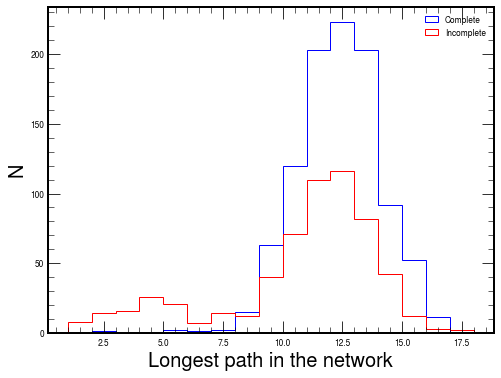

In [93]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(D5LongestPaths[:,0], bins=(max(D5LongestPaths[:,0])-min(D5LongestPaths[:,0])), color='b', histtype="step",label='Complete')
plt.hist(D2LongestPaths[:,0], bins=(max(D2LongestPaths[:,0])-min(D2LongestPaths[:,0])), color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Longest path in the network",fontsize=20)
#plt.title(datasetName+" PRDir",fontsize=20)
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+"incVsCom_PRDirCent_longestPath.png")
plt.show()

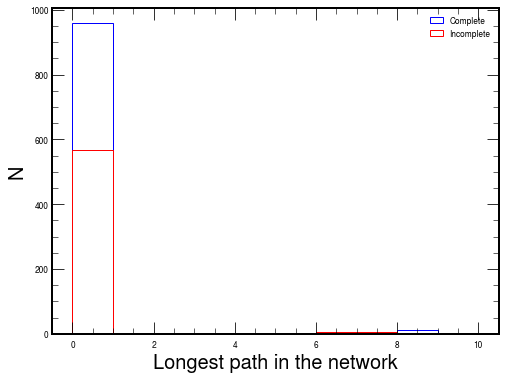

In [94]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(D5LongestPaths[:,1], bins=(max(D5LongestPaths[:,1])-min(D5LongestPaths[:,1])), color='b', histtype="step",label='Complete')
plt.hist(D2LongestPaths[:,1], bins=(max(D2LongestPaths[:,1])-min(D2LongestPaths[:,1])), color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Longest path in the network",fontsize=20)
#plt.title(datasetName+" PRDir",fontsize=20)
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+"incVsCom_PRDirCent_longestPath.png")
plt.show()

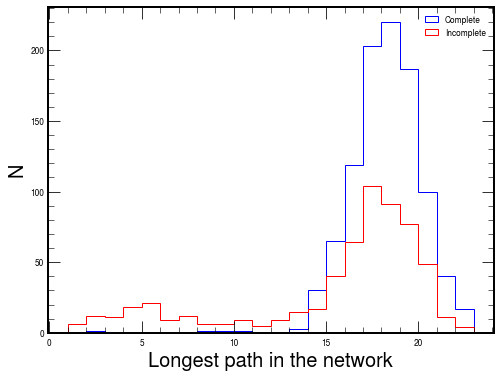

In [95]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(D5LongestPathsFirstNode[:,0], 
                            bins=(max(D5LongestPathsFirstNode[:,0])-min(D5LongestPathsFirstNode[:,0])),
                            color='b', histtype="step",label='Complete')
plt.hist(D2LongestPathsFirstNode[:,0],
         bins=(max(D2LongestPathsFirstNode[:,0])-min(D2LongestPathsFirstNode[:,0])),
         color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Longest path in the network",fontsize=20)
#plt.title(datasetName+" PRDir",fontsize=20)
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+"incVsCom_PRDirCent_longestPath.png")
plt.show()

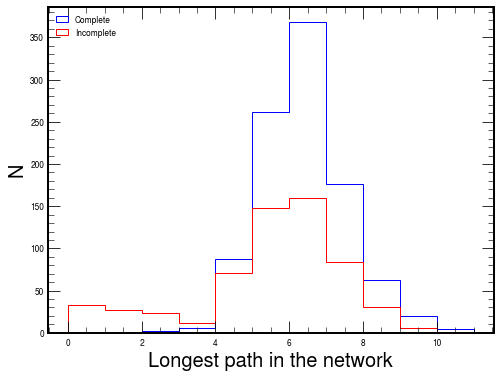

In [96]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(D5LongestPathsFirstNode[:,1], 
                            bins=(max(D5LongestPathsFirstNode[:,1])-min(D5LongestPathsFirstNode[:,1])),
                            color='b', histtype="step",label='Complete')
plt.hist(D2LongestPathsFirstNode[:,1],
         bins=(max(D2LongestPathsFirstNode[:,1])-min(D2LongestPathsFirstNode[:,1])),
         color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Longest path in the network",fontsize=20)
#plt.title(datasetName+" PRDir",fontsize=20)
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+"incVsCom_PRDirCent_longestPath.png")
plt.show()

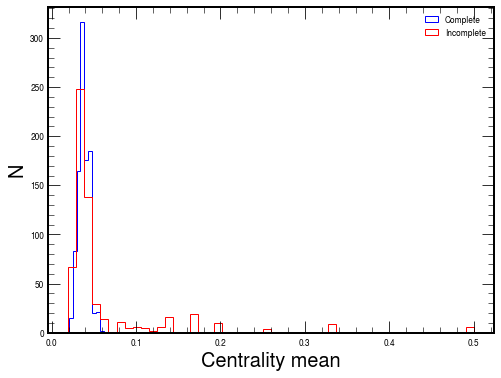

In [97]:
%matplotlib inline
centralityName="PRUnDirCent"
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(D5CenParams[:,0], bins=50, color='b', histtype="step",label='Complete')
plt.hist(D2CenParams[:,0], bins=50, color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Centrality mean",fontsize=20)
#plt.title(datasetName+" "+centralityName,fontsize=20)
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+"incVsCom_PRDirCent_mean.png")
plt.show()

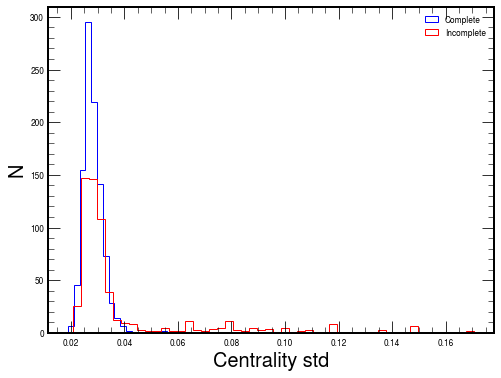

In [98]:
%matplotlib inline
centralityName="PRUnDirCent"
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(D5CenParams[:,1], bins=50, color='b', histtype="step",label='Complete')
plt.hist(D2CenParams[:,1], bins=50, color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Centrality std",fontsize=20)
#plt.title(datasetName+" "+centralityName,fontsize=20)
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+"incVsCom_PRDirCent_mean.png")
plt.show()

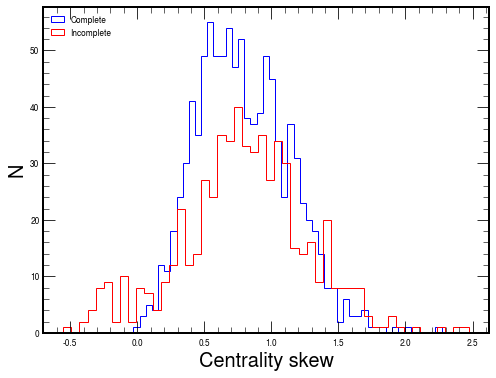

In [99]:
%matplotlib inline
centralityName="PRUnDirCent"
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(D5CenParams[:,2], bins=50, color='b', histtype="step",label='Complete')
plt.hist(D2CenParams[:,2], bins=50, color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Centrality skew",fontsize=20)
#plt.title(datasetName+" "+centralityName,fontsize=20)
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+"incVsCom_PRDirCent_mean.png")
plt.show()

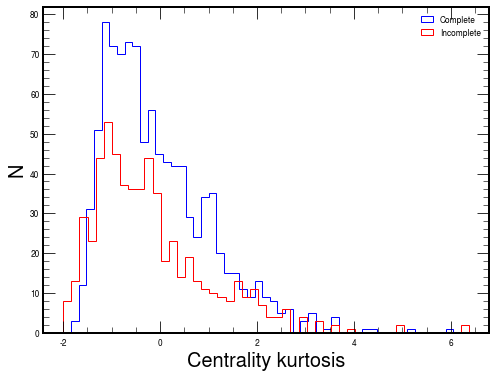

In [100]:
%matplotlib inline
centralityName="PRUnDirCent"
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(D5CenParams[:,3], bins=50, color='b', histtype="step",label='Complete')
plt.hist(D2CenParams[:,3], bins=50, color='r', histtype="step",label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Centrality kurtosis",fontsize=20)
#plt.title(datasetName+" "+centralityName,fontsize=20)
#if(savefigs):
#    plt.savefig("figures/"+folder+"/"+"incVsCom_PRDirCent_mean.png")
plt.show()

In [44]:
N = len(verticesE50D2_indexes)

E50D2Eta=[]
E50D2Phi=[]

for evt in range(N):
    for tr in range(min(len(verticesE50D2_indexes[evt]),2)):
        Eta=delta_Eta(hitsE50D2_y[evt,tr],hitsE50D2_z[evt,tr])
        Phi=delta_Phi(hitsE50D2_x[evt,tr],hitsE50D2_z[evt,tr])
        if(ak.any(np.isnan(Phi)) or ak.any(np.isnan(Eta))):
            continue
        if(len(Phi)!=len(Eta)):
            continue
        E50D2Eta.append(Eta-np.mean(Eta))
        E50D2Phi.append(Phi-np.mean(Phi))

    
N = len(verticesD5_indexes)
D5Eta=[]
D5Phi=[]
for evt in range(N):
    for tr in range(min(len(verticesD5_indexes[evt]),2)):
        Phi=delta_Phi(hitsD5_x[evt,tr],hitsD5_z[evt,tr])
        Eta=delta_Eta(hitsD5_y[evt,tr],hitsD5_z[evt,tr])
        if(ak.any(np.isnan(Phi)) or ak.any(np.isnan(Eta))):
            continue
        if(len(Phi)!=len(Eta)):
            continue
        D5Eta.append(Eta-np.mean(Eta))
        D5Phi.append(Phi-np.mean(Phi))

In [48]:
#print(E50D2Eta)
#print(sum(np.isnan(E50D2Eta)))
print(ak.count(E50D2Eta,axis=-1),ak.count(E50D2Phi,axis=-1))
print(ak.count(D5Eta),ak.count(D5Phi))
print(len(ak.flatten(E50D2Eta)))

[489, 447, 27, 64, 403, 429, 449, 466, ... 479, 463, 470, 453, 407, 29, 387, 111] [489, 447, 27, 64, 403, 429, 449, 466, ... 479, 463, 470, 453, 407, 29, 387, 111]
389295 389295
222131


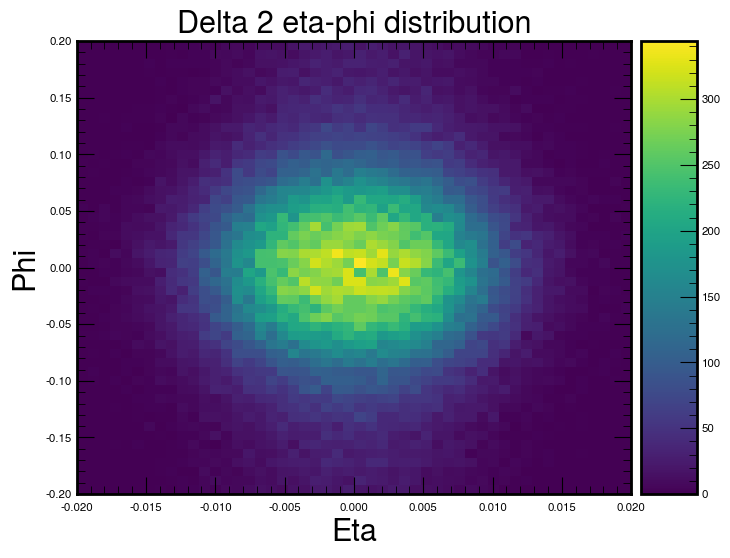

In [55]:


heatmap, xedges, yedges = np.histogram2d(ak.flatten(E50D2Eta),ak.flatten(E50D2Phi),bins=50,range=[[-0.02,0.02],[-0.2,0.2]])

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig=plt.figure(figsize=(8,6),dpi=100)
ax=plt.gca()
im=ax.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')
plt.title("Delta 2 eta-phi distribution",fontsize=22)
plt.xlabel("Eta",fontsize=22)
plt.ylabel("Phi",fontsize=22)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1)
   
plt.colorbar(im, cax=cax)
plt.show()
#plt.(np.arange(1,len(comCenProfArray[i])+1)/comNVerticesList[i],comCenProfArray[i])


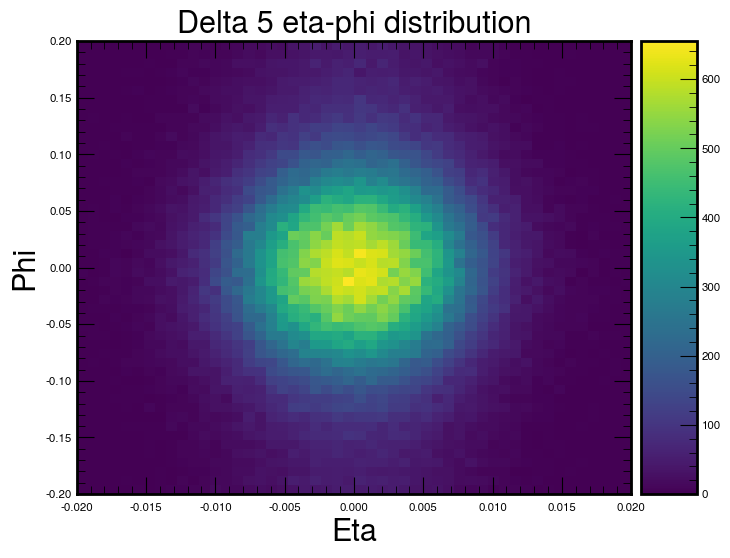

In [56]:


heatmap, xedges, yedges = np.histogram2d(ak.flatten(D5Eta),ak.flatten(D5Phi),bins=50,range=[[-0.02,0.02],[-0.2,0.2]])

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig=plt.figure(figsize=(8,6),dpi=100)
ax=plt.gca()
im=ax.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')
plt.title("Delta 5 eta-phi distribution",fontsize=22)
plt.xlabel("Eta",fontsize=22)
plt.ylabel("Phi",fontsize=22)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1)
   
plt.colorbar(im, cax=cax)
plt.show()
#plt.(np.arange(1,len(comCenProfArray[i])+1)/comNVerticesList[i],comCenProfArray[i])


In [7]:
def mergedShowerShapes(tracksters):
    showerShapes=[]
    v_E = tracksters['vertices_energy'].array()
    v_ind = tracksters['vertices_indexes'].array()
    v_x = tracksters['vertices_x'].array()
    v_y = tracksters['vertices_y'].array()
    v_z = tracksters['vertices_z'].array()
    h_x = tracksters['recHits_x'].array()
    h_y = tracksters['recHits_y'].array()
    h_z = tracksters['recHits_z'].array()
    h_E = tracksters['recHits_energy'].array()
    v_layers=tracksters['vertices_layer'].array()
    tr_E=tracksters['raw_energy'].array()
    tr_phi=tracksters['trackster_barycenter_phi'].array()
    tr_eta=tracksters['trackster_barycenter_eta'].array()
    for evt in range(len(v_ind)):
        
        for tr in range(len(v_ind[evt])):
            print(evt,tr)
            
            #print(v_E_inc)
            if(len(v_ind[evt,tr])<2):
                continue
            if(sum(v_E[evt,tr])<2):
                continue

            showerShapes.append([
                delta_eta_phi(v_x[evt,tr],v_y[evt,tr],v_z[evt,tr],tr_eta[evt,tr],tr_phi[evt,tr]),
                delta_eta_phi_EW(v_x[evt,tr],v_y[evt,tr],v_z[evt,tr],tr_eta[evt,tr],tr_phi[evt,tr],v_E[evt,tr]),
                delta_eta_phi(h_x[evt,tr],h_y[evt,tr],h_z[evt,tr],tr_eta[evt,tr],tr_phi[evt,tr]),
                delta_eta_phi_EW(h_x[evt,tr],h_y[evt,tr],h_z[evt,tr],tr_eta[evt,tr],tr_phi[evt,tr],h_E[evt,tr]),
                np.mean(v_z[evt,tr]),
                np.mean(v_z[evt,tr]*v_E[evt,tr]),
                np.mean(v_z[evt,tr]*v_E[evt,tr])/sum(v_E[evt,tr]),
                len(v_E[evt,tr])/sum(v_E[evt,tr])
            ])
    
    return np.asarray(showerShapes)

In [8]:
showerShapesE100D2=mergedShowerShapes(trackstersE100D2)
showerShapesE100D2p5=mergedShowerShapes(trackstersE100D2p5)
showerShapesE100D3=mergedShowerShapes(trackstersE100D3)
showerShapesE100D5=mergedShowerShapes(trackstersE100D5)

0 0
0 1
1 0
2 0
3 0
3 1
4 0
5 0
6 0
7 0
7 1
8 0
9 0
10 0
10 1
11 0
12 0
13 0
14 0
15 0
16 0
17 0
17 1
18 0
19 0
19 1
20 0
20 1
20 2
21 0
21 1
22 0
22 1
23 0
24 0
25 0
25 1
26 0
26 1
27 0
28 0
29 0
29 1
30 0
31 0
32 0
33 0
33 1
33 2
34 0
34 1
35 0
36 0
36 1
37 0
38 0
39 0
40 0
40 1
41 0
42 0
43 0
44 0
44 1
45 0
45 1
46 0
47 0
47 1
47 2
48 0
49 0
50 0
51 0
51 1
51 2
52 0
53 0
54 0
55 0
56 0
57 0
57 1
58 0
59 0
59 1
60 0
60 1
61 0
61 1
61 2
61 3
62 0
63 0
64 0
65 0
66 0
66 1
67 0
68 0
69 0
69 1
70 0
70 1
71 0
72 0
73 0
73 1
74 0
75 0
76 0
76 1
77 0
78 0
78 1
78 2
79 0
80 0
81 0
81 1
81 2
82 0
83 0
84 0
85 0
85 1
86 0
87 0
87 1
88 0
88 1
89 0
89 1
90 0
91 0
92 0
92 1
93 0
94 0
95 0
96 0
96 1
97 0
98 0
98 1
99 0
100 0
100 1
101 0
101 1
102 0
103 0
103 1
104 0
104 1
105 0
106 0
106 1
107 0
108 0
109 0
109 1
110 0
110 1
110 2
111 0
112 0
112 1
112 2
113 0
114 0
114 1
115 0
116 0
117 0
117 1
118 0
118 1
119 0
119 1
120 0
121 0
122 0
122 1
123 0
124 0
125 0
125 1
126 0
127 0
128 0
129 0
130 0
1

267 1
267 2
268 0
268 1
268 2
269 0
269 1
270 0
270 1
270 2
271 0
271 1
272 0
272 1
273 0
273 1
274 0
274 1
274 2
275 0
275 1
276 0
276 1
276 2
277 0
277 1
277 2
278 0
278 1
278 2
279 0
279 1
280 0
280 1
280 2
281 0
281 1
281 2
282 0
282 1
282 2
282 3
283 0
283 1
283 2
284 0
284 1
284 2
285 0
285 1
285 2
286 0
286 1
286 2
286 3
287 0
287 1
287 2
287 3
287 4
288 0
288 1
288 2
289 0
289 1
289 2
290 0
290 1
290 2
291 0
291 1
291 2
292 0
292 1
293 0
293 1
293 2
294 0
294 1
294 2
295 0
295 1
296 0
296 1
296 2
297 0
297 1
298 0
298 1
299 0
299 1
299 2
299 3
300 0
300 1
300 2
300 3
301 0
301 1
302 0
302 1
303 0
303 1
303 2
304 0
304 1
304 2
305 0
305 1
306 0
306 1
306 2
307 0
307 1
308 0
308 1
308 2
308 3
309 0
309 1
309 2
309 3
309 4
310 0
310 1
311 0
311 1
311 2
312 0
312 1
313 0
313 1
313 2
314 0
314 1
314 2
314 3
315 0
315 1
316 0
316 1
316 2
317 0
317 1
317 2
317 3
318 0
318 1
319 0
319 1
319 2
320 0
320 1
320 2
321 0
321 1
321 2
321 3
322 0
322 1
323 0
323 1
324 0
324 1
324 2
325 0
325 

290 2
291 0
291 1
292 0
292 1
292 2
293 0
293 1
294 0
294 1
294 2
295 0
295 1
295 2
296 0
296 1
296 2
297 0
297 1
298 0
298 1
299 0
299 1
300 0
300 1
301 0
301 1
302 0
302 1
303 0
303 1
304 0
304 1
305 0
305 1
305 2
306 0
306 1
307 0
307 1
308 0
308 1
309 0
309 1
309 2
310 0
310 1
310 2
310 3
310 4
311 0
311 1
311 2
312 0
312 1
313 0
313 1
313 2
314 0
314 1
314 2
315 0
315 1
316 0
316 1
316 2
317 0
317 1
317 2
318 0
318 1
319 0
319 1
319 2
320 0
320 1
320 2
321 0
321 1
321 2
322 0
322 1
322 2
323 0
323 1
324 0
324 1
325 0
325 1
325 2
326 0
326 1
327 0
327 1
328 0
328 1
329 0
329 1
330 0
330 1
330 2
331 0
331 1
331 2
332 0
332 1
332 2
333 0
333 1
334 0
334 1
335 0
335 1
336 0
336 1
337 0
337 1
338 0
338 1
339 0
339 1
340 0
340 1
341 0
341 1
342 0
342 1
342 2
343 0
343 1
343 2
344 0
344 1
345 0
345 1
346 0
346 1
347 0
347 1
348 0
348 1
348 2
349 0
349 1
350 0
350 1
351 0
351 1
351 2
351 3
352 0
352 1
352 2
353 0
353 1
354 0
354 1
355 0
355 1
355 2
355 3
356 0
356 1
357 0
357 1
358 0
358 

387 1
388 0
388 1
389 0
389 1
390 0
390 1
391 0
391 1
392 0
392 1
393 0
393 1
394 0
394 1
395 0
395 1
396 0
396 1
396 2
397 0
397 1
398 0
398 1
398 2
399 0
399 1
400 0
400 1
401 0
401 1
402 0
402 1
403 0
403 1
404 0
404 1
405 0
405 1
406 0
406 1
406 2
407 0
407 1
407 2
407 3
407 4
408 0
408 1
409 0
409 1
409 2
410 0
410 1
411 0
411 1
411 2
412 0
412 1
412 2
412 3
413 0
413 1
413 2
414 0
414 1
415 0
415 1
415 2
416 0
416 1
417 0
417 1
418 0
418 1
419 0
419 1
420 0
420 1
421 0
421 1
421 2
422 0
422 1
423 0
423 1
423 2
424 0
424 1
425 0
425 1
426 0
426 1
426 2
427 0
427 1
427 2
428 0
428 1
429 0
429 1
429 2
429 3
430 0
430 1
431 0
431 1
432 0
432 1
432 2
433 0
433 1
434 0
434 1
435 0
435 1
435 2
436 0
436 1
436 2
437 0
437 1
438 0
438 1
439 0
439 1
440 0
440 1
441 0
441 1
442 0
442 1
443 0
443 1
444 0
444 1
445 0
445 1
446 0
446 1
447 0
447 1
447 2
448 0
448 1
448 2
449 0
449 1
449 2
450 0
450 1
451 0
451 1
452 0
452 1
453 0
453 1
454 0
454 1
455 0
455 1
456 0
456 1
456 2
457 0
457 1
458 

In [9]:
showerShapesE50D2=mergedShowerShapes(trackstersE50D2)
showerShapesE50D2p5=mergedShowerShapes(trackstersE50D2p5)
showerShapesE50D3=mergedShowerShapes(trackstersE50D3)
showerShapesE50D5=mergedShowerShapes(trackstersE50D5)

0 0
1 0
1 1
2 0
2 1
2 2
3 0
4 0
5 0
6 0
7 0
8 0
8 1
9 0
10 0
10 1
10 2
10 3
11 0
12 0
13 0
14 0
14 1
15 0
16 0
17 0
18 0
18 1
19 0
20 0
21 0
22 0
23 0
24 0
24 1
25 0
26 0
27 0
27 1
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
35 1
36 0
37 0
37 1
38 0
39 0
40 0
40 1
41 0
41 1
42 0
42 1
43 0
43 1
44 0
45 0
46 0
46 1
47 0
48 0
49 0
49 1
50 0
51 0
52 0
53 0
53 1
54 0
54 1
54 2
55 0
56 0
57 0
58 0
58 1
59 0
60 0
61 0
62 0
63 0
63 1
63 2
64 0
65 0
66 0
67 0
68 0
69 0
70 0
70 1
71 0
72 0
73 0
74 0
75 0
76 0
77 0
77 1
77 2
78 0
78 1
79 0
79 1
80 0
81 0
81 1
82 0
83 0
84 0
85 0
85 1
86 0
87 0
87 1
88 0
89 0
90 0
90 1
91 0
92 0
93 0
93 1
93 2
93 3
94 0
95 0
95 1
96 0
97 0
98 0
99 0
99 1
100 0
101 0
101 1
101 2
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
109 1
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
118 1
119 0
120 0
120 1
120 2
121 0
122 0
123 0
123 1
124 0
125 0
126 0
127 0
127 1
128 0
129 0
130 0
130 1
131 0
132 0
133 0
134 0
134 1
134 2
135 0
136 0
137 0
138 0
138 1
139 0
139 1
1

281 0
281 1
282 0
282 1
283 0
283 1
283 2
284 0
284 1
285 0
285 1
285 2
286 0
286 1
287 0
287 1
288 0
288 1
288 2
289 0
289 1
290 0
290 1
290 2
291 0
291 1
292 0
292 1
292 2
293 0
293 1
293 2
294 0
294 1
295 0
295 1
296 0
296 1
296 2
296 3
297 0
297 1
297 2
297 3
298 0
298 1
298 2
299 0
299 1
299 2
300 0
300 1
301 0
301 1
302 0
302 1
303 0
303 1
303 2
304 0
304 1
304 2
304 3
305 0
305 1
305 2
306 0
306 1
306 2
307 0
307 1
307 2
308 0
308 1
309 0
309 1
309 2
310 0
310 1
311 0
311 1
311 2
312 0
312 1
313 0
313 1
313 2
314 0
314 1
314 2
315 0
315 1
316 0
316 1
316 2
317 0
317 1
318 0
318 1
318 2
319 0
319 1
319 2
320 0
320 1
320 2
320 3
321 0
321 1
321 2
322 0
322 1
322 2
322 3
323 0
323 1
324 0
324 1
324 2
325 0
325 1
325 2
326 0
326 1
327 0
327 1
327 2
328 0
328 1
328 2
328 3
329 0
329 1
329 2
330 0
330 1
330 2
331 0
331 1
332 0
332 1
333 0
333 1
333 2
333 3
334 0
334 1
335 0
335 1
335 2
336 0
336 1
337 0
337 1
338 0
338 1
339 0
339 1
340 0
340 1
341 0
341 1
341 2
342 0
342 1
342 2
343 

367 1
368 0
368 1
368 2
368 3
369 0
369 1
370 0
370 1
370 2
371 0
371 1
371 2
372 0
372 1
373 0
373 1
373 2
374 0
374 1
375 0
375 1
376 0
376 1
377 0
377 1
378 0
378 1
378 2
379 0
379 1
380 0
380 1
381 0
381 1
382 0
382 1
383 0
383 1
384 0
384 1
385 0
385 1
385 2
386 0
386 1
387 0
387 1
388 0
388 1
389 0
389 1
390 0
390 1
391 0
391 1
391 2
391 3
392 0
392 1
392 2
393 0
393 1
393 2
394 0
394 1
395 0
395 1
396 0
396 1
397 0
397 1
397 2
398 0
398 1
399 0
399 1
400 0
400 1
401 0
401 1
402 0
402 1
403 0
403 1
404 0
404 1
405 0
405 1
405 2
406 0
406 1
407 0
407 1
408 0
408 1
408 2
409 0
409 1
410 0
410 1
411 0
411 1
412 0
412 1
413 0
413 1
414 0
414 1
415 0
415 1
415 2
416 0
416 1
417 0
417 1
417 2
418 0
418 1
419 0
419 1
420 0
420 1
421 0
421 1
422 0
422 1
423 0
423 1
424 0
424 1
424 2
424 3
425 0
425 1
426 0
426 1
427 0
427 1
428 0
428 1
429 0
429 1
430 0
430 1
431 0
431 1
432 0
432 1
433 0
433 1
434 0
434 1
434 2
435 0
435 1
436 0
436 1
437 0
437 1
438 0
438 1
438 2
439 0
439 1
439 2
440 

499 0
499 1


In [10]:
showerShapesE25D2=mergedShowerShapes(trackstersE25D2)
showerShapesE25D2p5=mergedShowerShapes(trackstersE25D2p5)
showerShapesE25D3=mergedShowerShapes(trackstersE25D3)
showerShapesE25D5=mergedShowerShapes(trackstersE25D5)

0 0
0 1
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
8 1
9 0
10 0
11 0
11 1
12 0
12 1
13 0
14 0
14 1
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
22 1
22 2
23 0
24 0
25 0
26 0
27 0
27 1
28 0
29 0
30 0
31 0
31 1
32 0
33 0
34 0
35 0
36 0
36 1
37 0
38 0
39 0
39 1
40 0
40 1
40 2
41 0
42 0
43 0
44 0
44 1
45 0
45 1
46 0
47 0
48 0
49 0
50 0
51 0
51 1
52 0
53 0
54 0
54 1
55 0
56 0
57 0
58 0
59 0
59 1
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
68 1
69 0
70 0
70 1
71 0
72 0
73 0
73 1
74 0
74 1
74 2
75 0
76 0
77 0
78 0
79 0
79 1
80 0
81 0
81 1
82 0
83 0
83 1
84 0
85 0
86 0
87 0
88 0
88 1
89 0
89 1
89 2
89 3
90 0
91 0
92 0
92 1
93 0
94 0
94 1
95 0
95 1
95 2
96 0
97 0
98 0
98 1
99 0
100 0
101 0
101 1
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
112 1
112 2
113 0
113 1
114 0
114 1
115 0
116 0
116 1
116 2
117 0
118 0
119 0
119 1
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
132 1
133 0
134 0
135 0
136 0
137 0
137 1
138 0
139 0
140 0
140 1
141 0
142 0
143 0
143 1
1

314 1
315 0
315 1
316 0
316 1
316 2
317 0
317 1
317 2
318 0
318 1
318 2
319 0
319 1
320 0
320 1
321 0
321 1
322 0
322 1
322 2
323 0
323 1
323 2
323 3
324 0
324 1
325 0
325 1
326 0
326 1
326 2
327 0
327 1
327 2
328 0
328 1
328 2
329 0
329 1
329 2
330 0
330 1
330 2
331 0
331 1
331 2
332 0
332 1
333 0
333 1
334 0
334 1
335 0
335 1
336 0
336 1
337 0
337 1
338 0
338 1
338 2
339 0
339 1
340 0
340 1
340 2
341 0
341 1
341 2
342 0
342 1
343 0
343 1
343 2
343 3
344 0
344 1
345 0
345 1
345 2
346 0
346 1
346 2
347 0
347 1
348 0
348 1
348 2
349 0
349 1
349 2
349 3
350 0
350 1
350 2
350 3
351 0
351 1
351 2
352 0
352 1
352 2
353 0
353 1
353 2
354 0
354 1
354 2
355 0
355 1
356 0
356 1
357 0
357 1
358 0
358 1
358 2
359 0
359 1
359 2
360 0
360 1
361 0
361 1
362 0
362 1
363 0
363 1
364 0
364 1
365 0
365 1
366 0
366 1
367 0
367 1
367 2
368 0
368 1
368 2
369 0
369 1
370 0
370 1
371 0
371 1
372 0
372 1
373 0
373 1
374 0
374 1
374 2
375 0
375 1
376 0
376 1
376 2
376 3
377 0
377 1
378 0
378 1
379 0
379 1
380 

488 2
489 0
489 1
489 2
490 0
490 1
491 0
491 1
492 0
492 1
493 0
493 1
494 0
494 1
495 0
495 1
496 0
496 1
497 0
497 1
498 0
498 1
499 0
499 1
0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1
5 0
5 1
6 0
6 1
7 0
7 1
7 2
8 0
8 1
9 0
9 1
10 0
10 1
11 0
11 1
12 0
12 1
13 0
13 1
14 0
14 1
15 0
15 1
16 0
16 1
17 0
17 1
18 0
18 1
18 2
19 0
19 1
20 0
20 1
20 2
21 0
21 1
22 0
22 1
23 0
23 1
24 0
24 1
25 0
25 1
25 2
26 0
26 1
27 0
27 1
28 0
28 1
29 0
29 1
30 0
30 1
31 0
31 1
32 0
32 1
33 0
33 1
34 0
34 1
35 0
35 1
36 0
36 1
37 0
37 1
38 0
38 1
39 0
39 1
40 0
40 1
41 0
41 1
42 0
42 1
42 2
43 0
43 1
44 0
44 1
45 0
45 1
46 0
46 1
47 0
47 1
48 0
48 1
49 0
49 1
50 0
50 1
51 0
51 1
52 0
52 1
53 0
53 1
54 0
54 1
55 0
55 1
56 0
56 1
57 0
57 1
57 2
58 0
58 1
59 0
59 1
60 0
60 1
61 0
61 1
62 0
62 1
62 2
63 0
63 1
63 2
64 0
64 1
65 0
65 1
66 0
66 1
66 2
67 0
67 1
68 0
68 1
69 0
69 1
70 0
70 1
71 0
71 1
72 0
72 1
73 0
73 1
74 0
74 1
75 0
75 1
76 0
76 1
77 0
77 1
77 2
78 0
78 1
78 2
79 0
79 1
79 2
80 0
80 1
81 0
81

In [17]:
def plotShowerShapes(showerShapes,labels,dataName):
    plt.figure(figsize=(8,6))
    for i in range(len(showerShapes)):
        plt.hist(showerShapes[i][:,0], histtype="step",bins=100,range=(0,0.03),label=labels[i])
    plt.legend(fontsize=20)
    plt.ylabel("N",fontsize=20)
    plt.xlabel(r"$dR_{vert}$",fontsize=20)
    plt.show()
    #plt.savefig("/eos/user/d/dmagdali/figures/"+f"Merge{dataName}_dRVert.png")

    plt.figure(figsize=(8,6))
    for i in range(len(showerShapes)):
        plt.hist(showerShapes[i][:,1], histtype="step",bins=100,range=(0,0.0004),label=labels[i])
    plt.legend(fontsize=20)
    plt.ylabel("N",fontsize=20)
    plt.xlabel(r"$dR_{vert}$,EWeighted",fontsize=20)
    #plt.show()
    plt.savefig("/eos/user/d/dmagdali/figures/"+f"Merge{dataName}_dRVertEWeighted.png")

    plt.figure(figsize=(8,6))
    for i in range(len(showerShapes)):
        plt.hist(showerShapes[i][:,2], histtype="step",bins=100,range=(0.01,0.03),label=labels[i])
    plt.legend(fontsize=20)
    plt.ylabel("N",fontsize=20)
    plt.xlabel(r"$dR_{hits}$",fontsize=20)
    plt.show()
    #plt.savefig("/eos/user/d/dmagdali/figures/"+f"Merge{dataName}_dRHits.png")
    
    plt.figure(figsize=(8,6))
    for i in range(len(showerShapes)):
        plt.hist(showerShapes[i][:,3], histtype="step",bins=100,range=(0.00001,0.00004),label=labels[i])
    plt.legend(fontsize=20)
    plt.ylabel("N",fontsize=20)
    plt.xlabel(r"$dR_{hits}$,EWeighted",fontsize=20)
    plt.show()
    #plt.savefig("/eos/user/d/dmagdali/figures/"+f"Merge{dataName}_dRHitsEWeighted.png")
    
    plt.figure(figsize=(8,6))
    for i in range(len(showerShapes)):
        plt.hist(showerShapes[i][:,4], histtype="step",bins=100,range=(320,380),label=labels[i])
    plt.legend(fontsize=20)
    plt.ylabel("N",fontsize=20)
    plt.xlabel("Z mean",fontsize=20)
    #plt.show()
    plt.savefig("/eos/user/d/dmagdali/figures/"+f"Merge{dataName}_ZMean.png")
    
    plt.figure(figsize=(8,6))
    for i in range(len(showerShapes)):
        plt.hist(showerShapes[i][:,5], histtype="step",bins=100,range=(300,5000),label=labels[i])
    plt.legend(fontsize=20)
    plt.ylabel("N",fontsize=20)
    plt.xlabel("Z*E mean",fontsize=20)
    plt.show()
    
    plt.figure(figsize=(8,6))
    for i in range(len(showerShapes)):
        plt.hist(showerShapes[i][:,6], histtype="step",bins=100,range=(0,100),label=labels[i])
    plt.legend(fontsize=20)
    plt.ylabel("N",fontsize=20)
    plt.xlabel("Z*E mean/tot_E",fontsize=20)
    plt.show()
    
    plt.figure(figsize=(8,6))
    for i in range(len(showerShapes)):
        plt.hist(showerShapes[i][:,7], histtype="step",bins=100,range=(0,0.5),label=labels[i])
    plt.legend(fontsize=20)
    plt.ylabel("N",fontsize=20)
    plt.xlabel("NVert/tot_E",fontsize=20)
    plt.show()
    

<IPython.core.display.Javascript object>


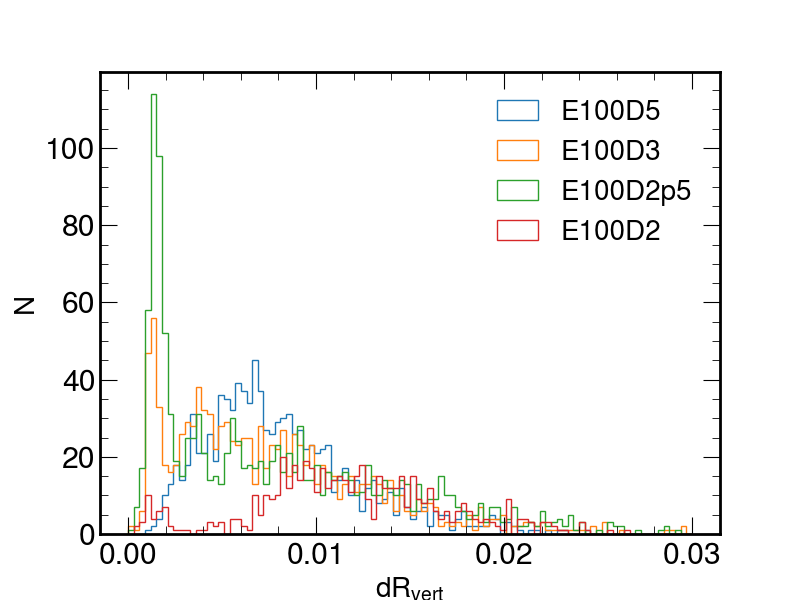

<IPython.core.display.Javascript object>


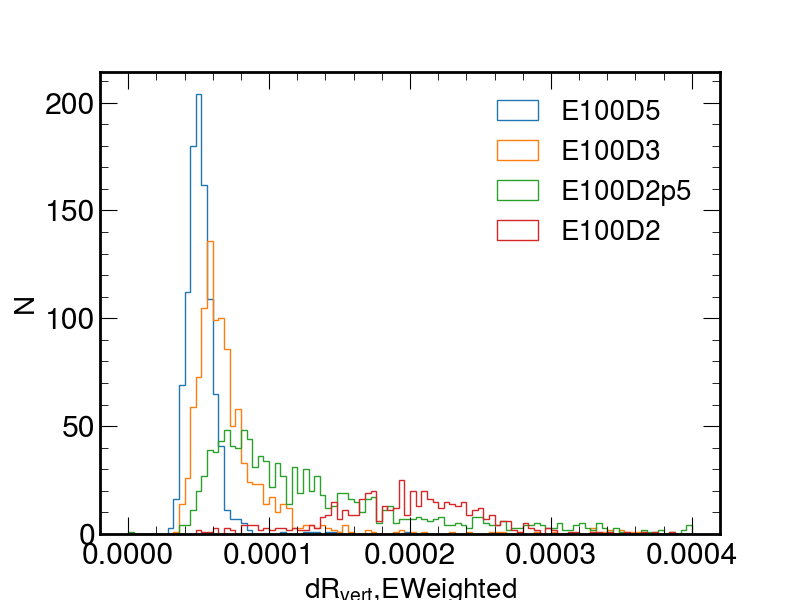

<IPython.core.display.Javascript object>


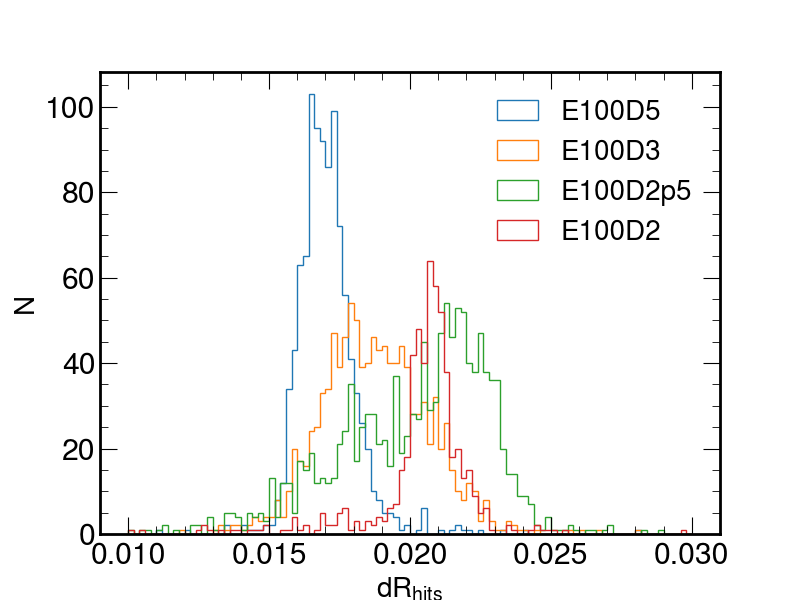

<IPython.core.display.Javascript object>


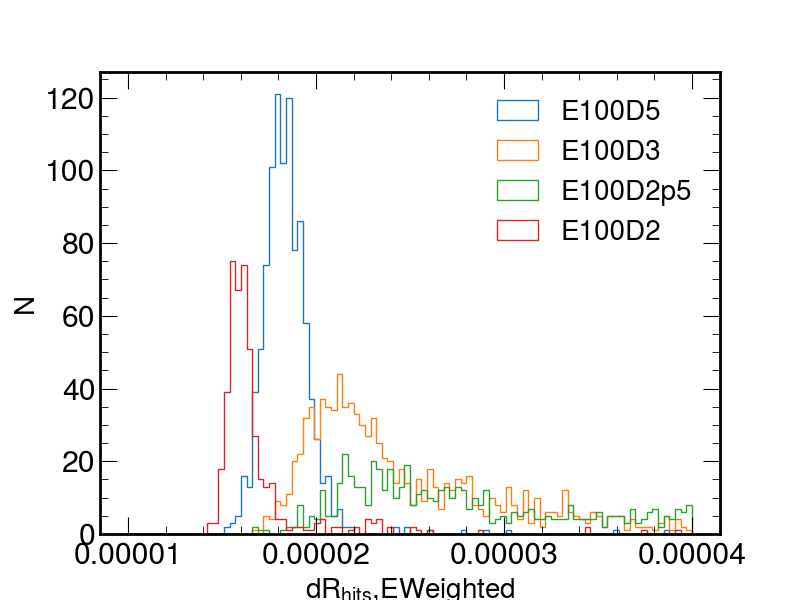

<IPython.core.display.Javascript object>


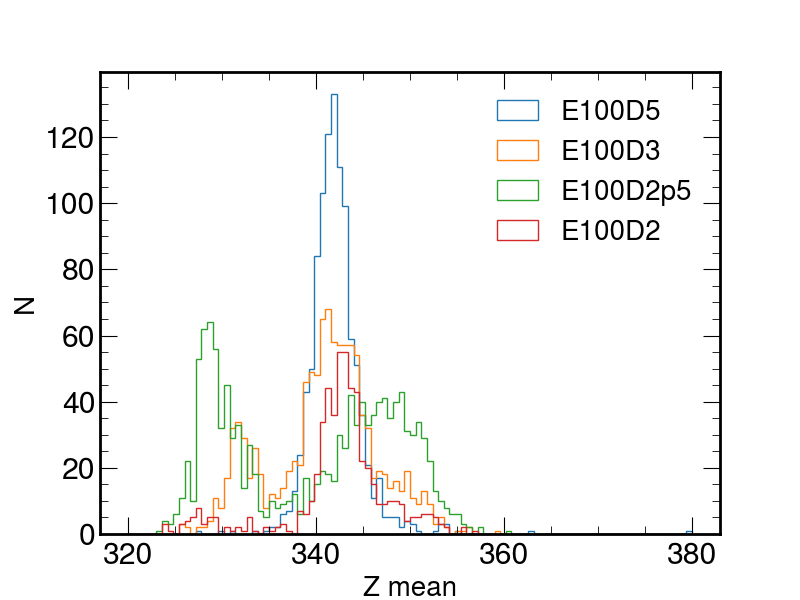

<IPython.core.display.Javascript object>


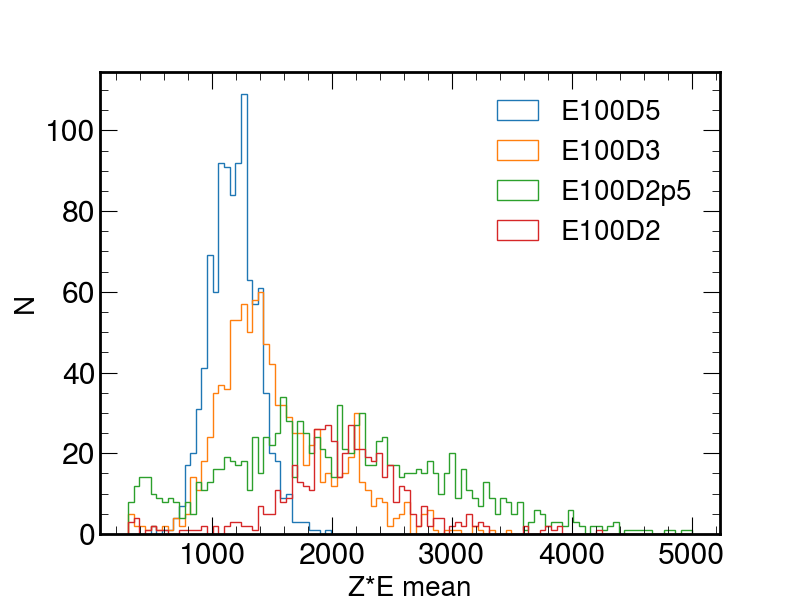

<IPython.core.display.Javascript object>


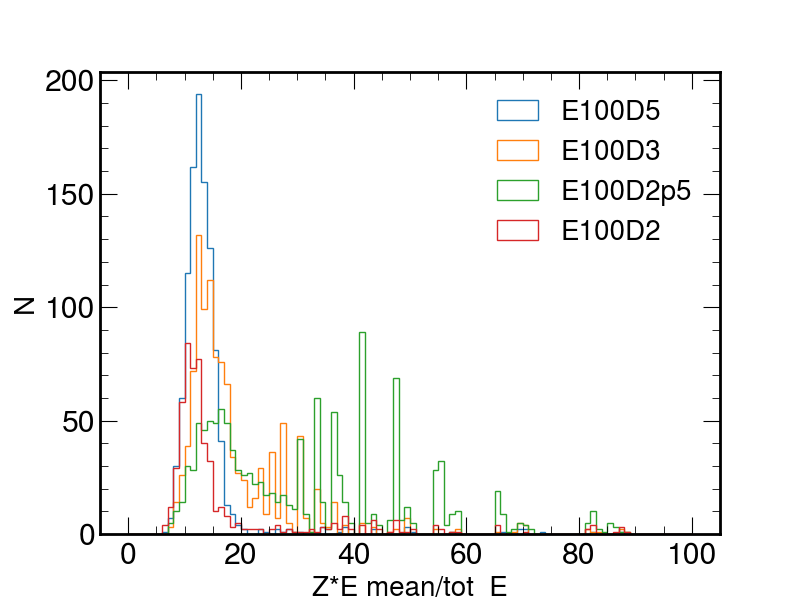

<IPython.core.display.Javascript object>


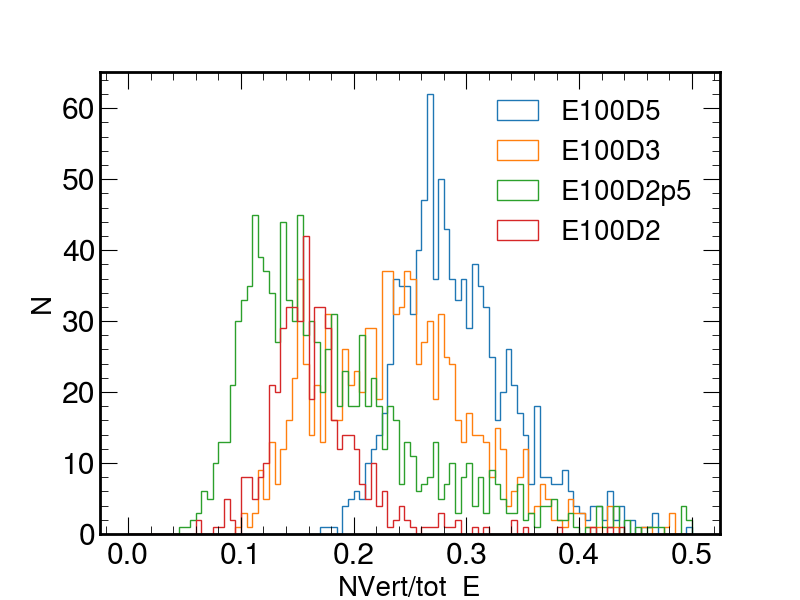

In [12]:
showerShapes=np.asarray([showerShapesE100D5,showerShapesE100D3,showerShapesE100D2p5,showerShapesE100D2])
labels=["E100D5","E100D3","E100D2p5","E100D2"]
plotShowerShapes(showerShapes,labels,"E100")

<IPython.core.display.Javascript object>


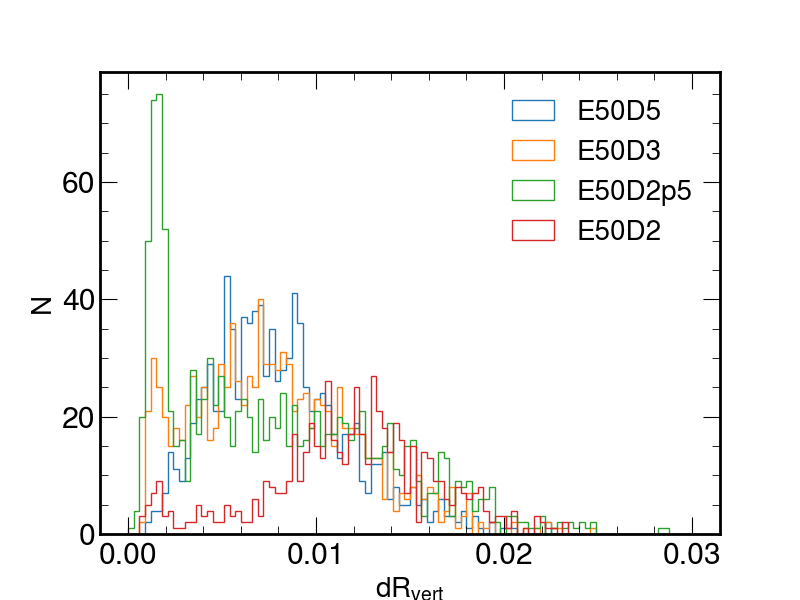

<IPython.core.display.Javascript object>


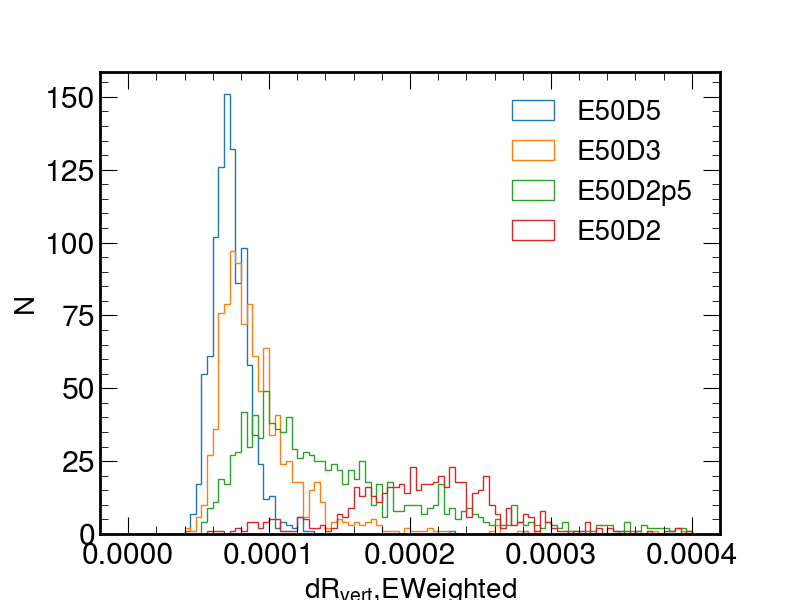

<IPython.core.display.Javascript object>


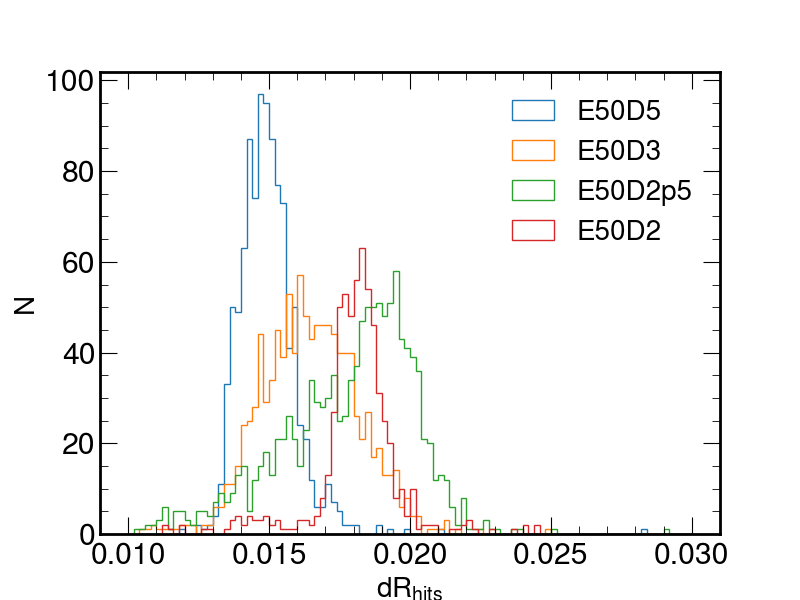

<IPython.core.display.Javascript object>


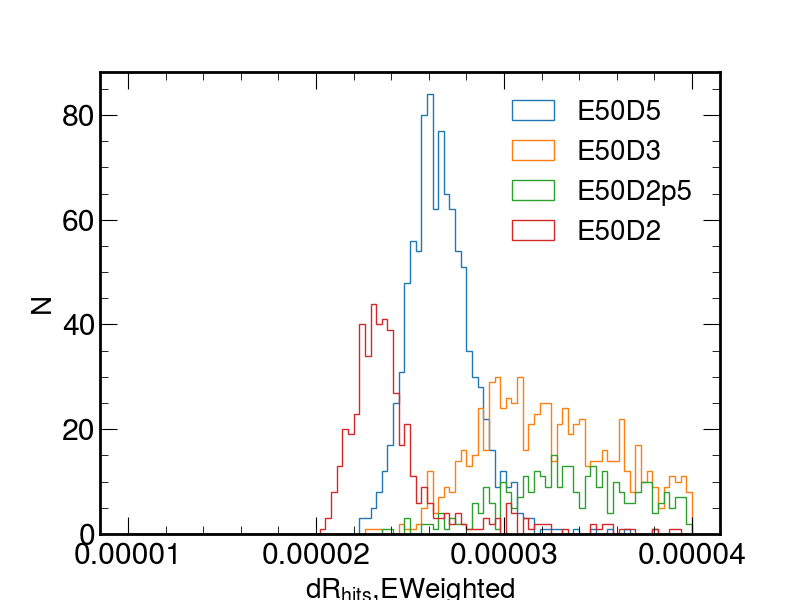

<IPython.core.display.Javascript object>


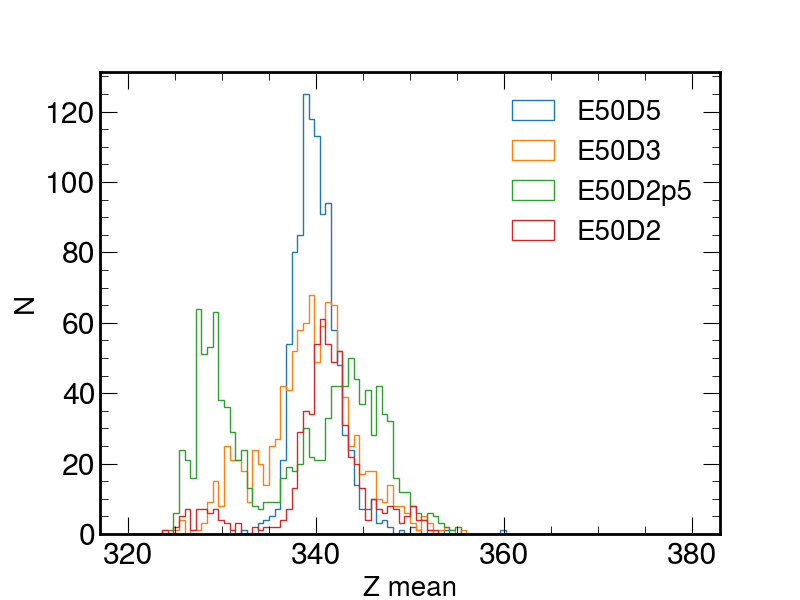

<IPython.core.display.Javascript object>


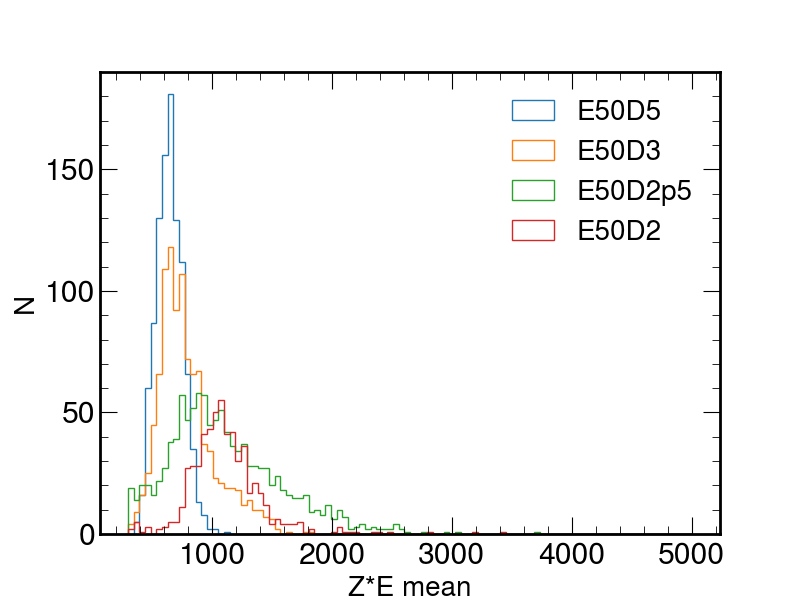

<IPython.core.display.Javascript object>


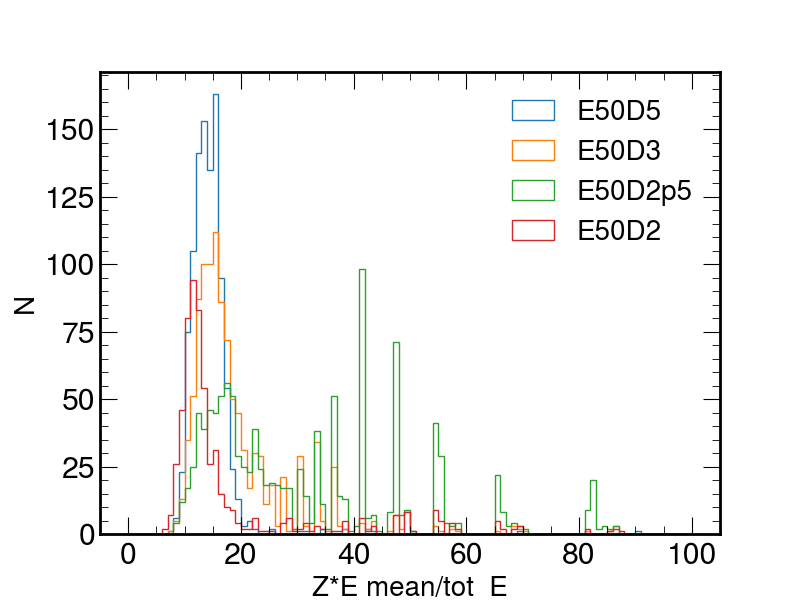

<IPython.core.display.Javascript object>


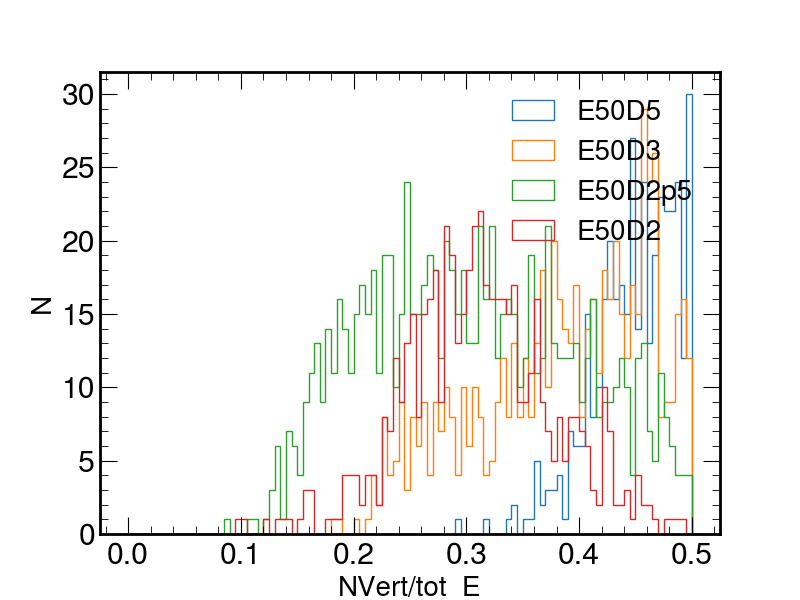

In [13]:
showerShapes=np.asarray([showerShapesE50D5,showerShapesE50D3,showerShapesE50D2p5,showerShapesE50D2])
labels=["E50D5","E50D3","E50D2p5","E50D2"]
plotShowerShapes(showerShapes,labels,"E50")

<IPython.core.display.Javascript object>


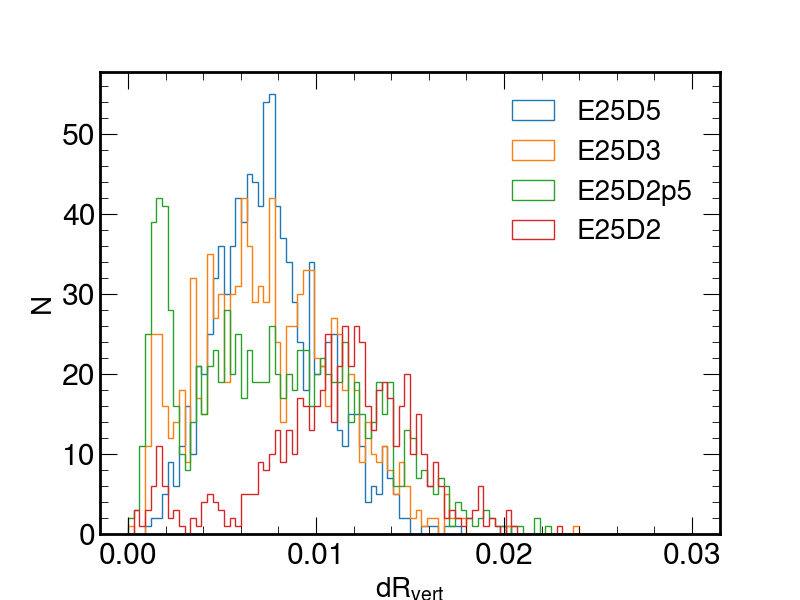

<IPython.core.display.Javascript object>


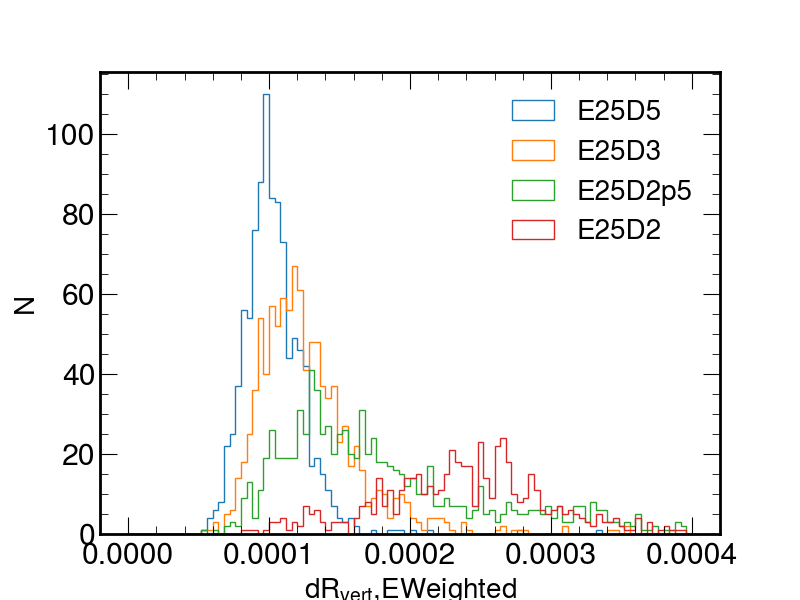

<IPython.core.display.Javascript object>


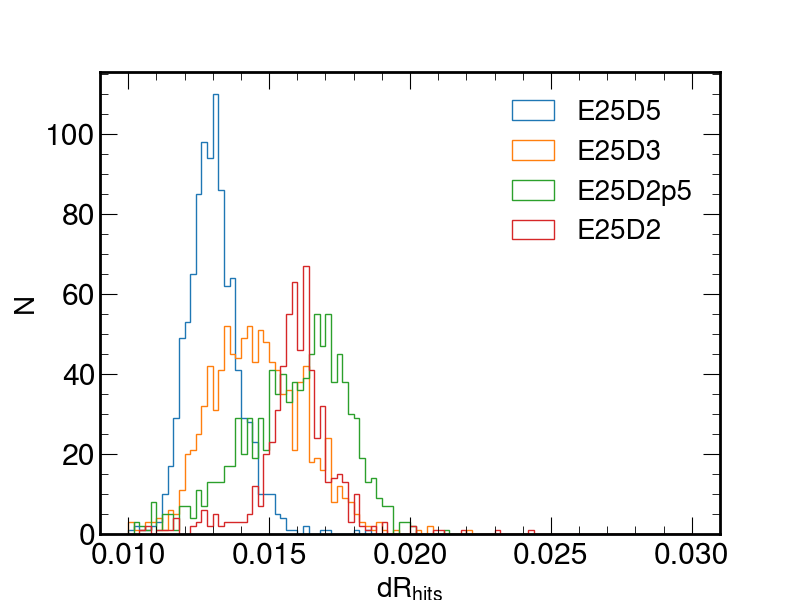

<IPython.core.display.Javascript object>


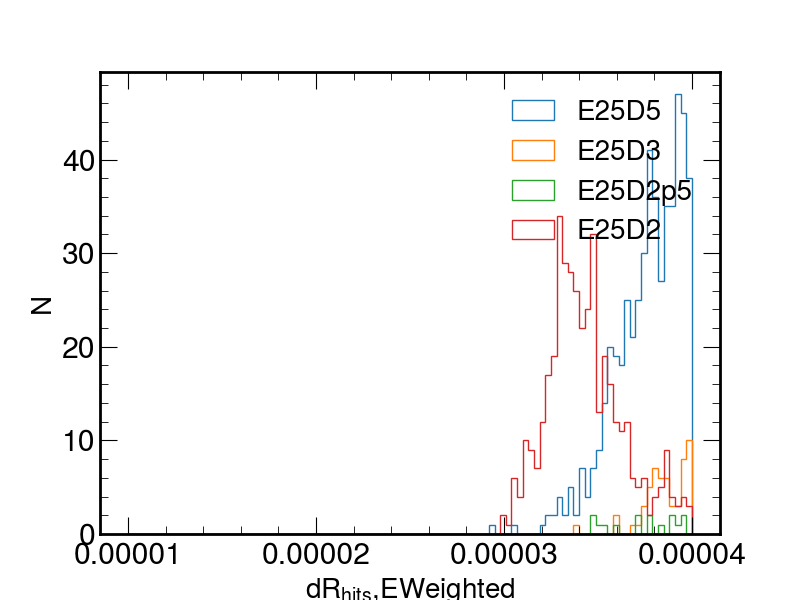

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


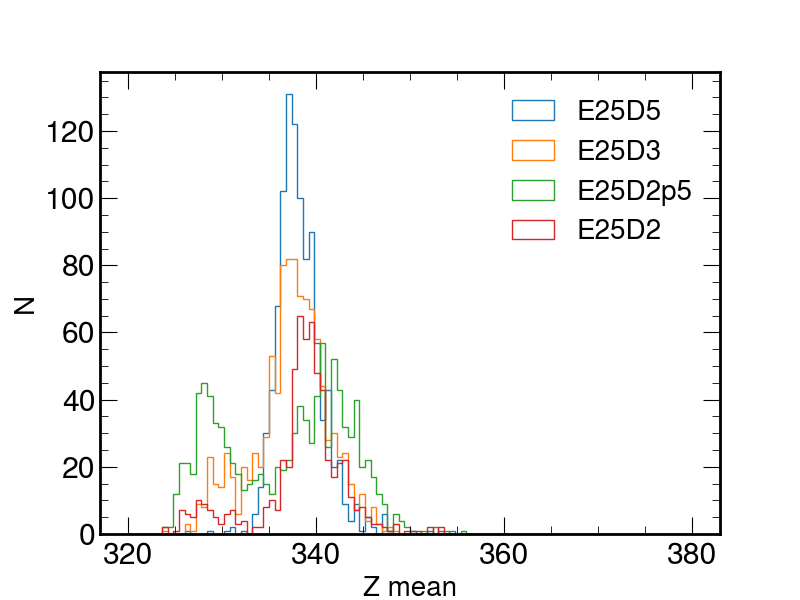

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


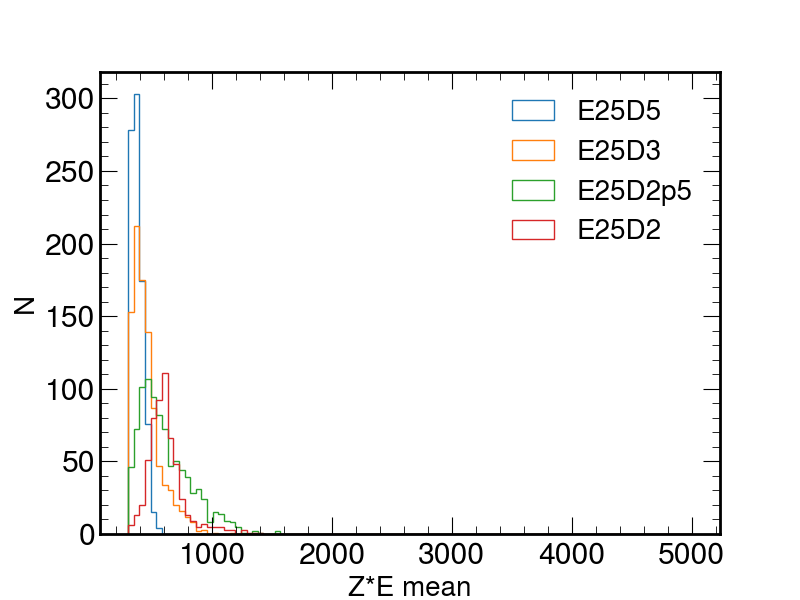

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


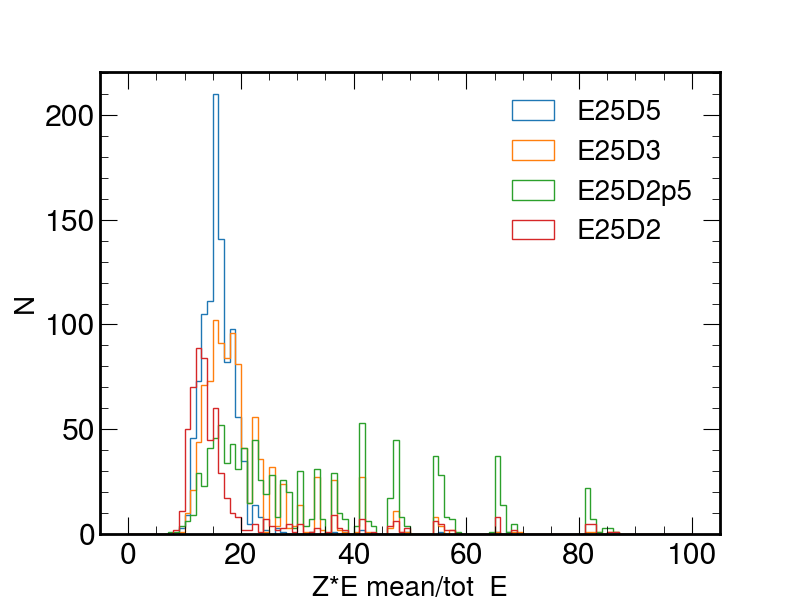

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


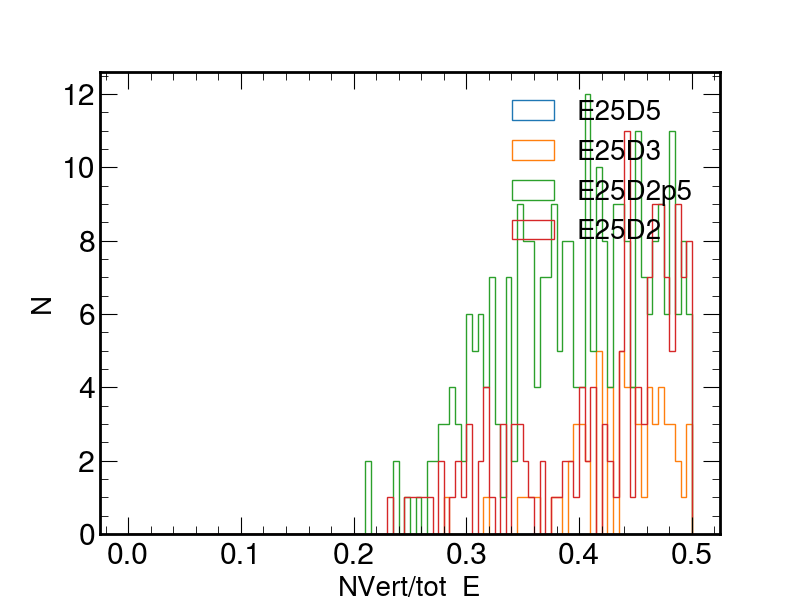

In [14]:
showerShapes=np.asarray([showerShapesE25D5,showerShapesE25D3,showerShapesE25D2p5,showerShapesE25D2])
labels=["E25D5","E25D3","E25D2p5","E25D2"]
plotShowerShapes(showerShapes,labels,"E25")

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


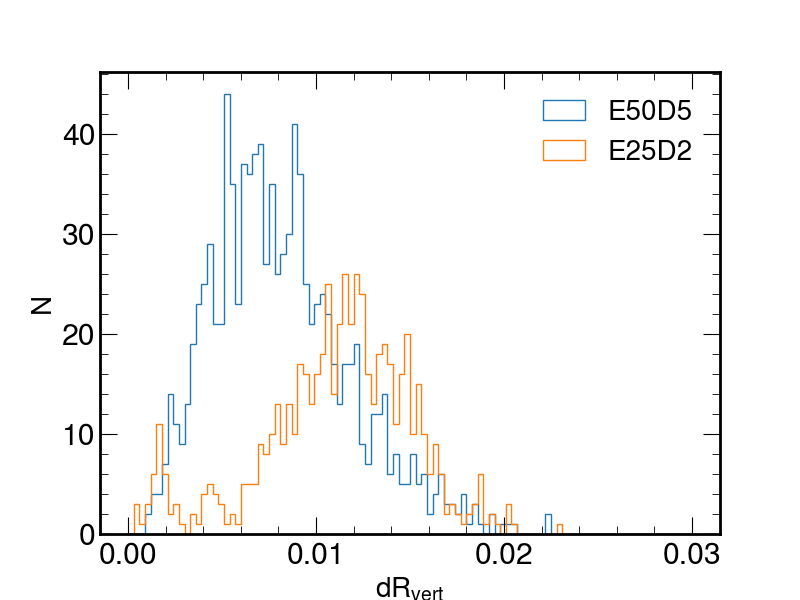

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


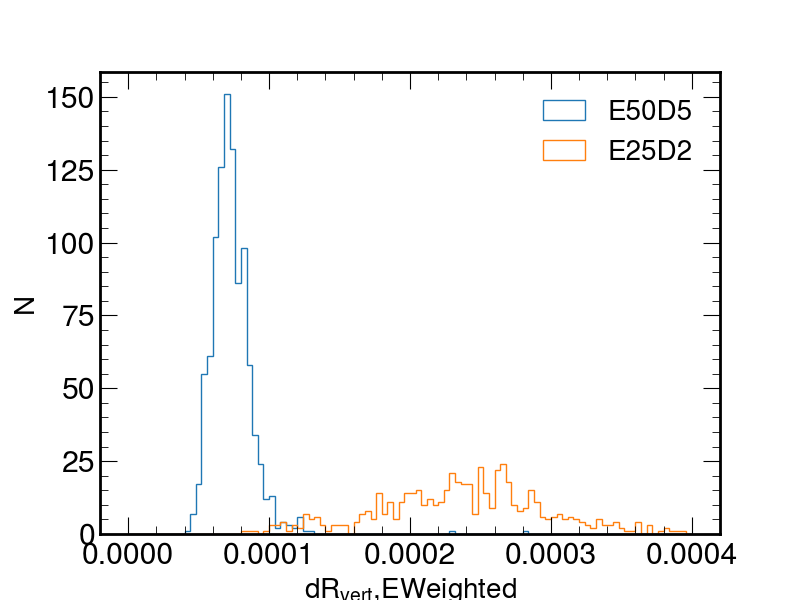

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


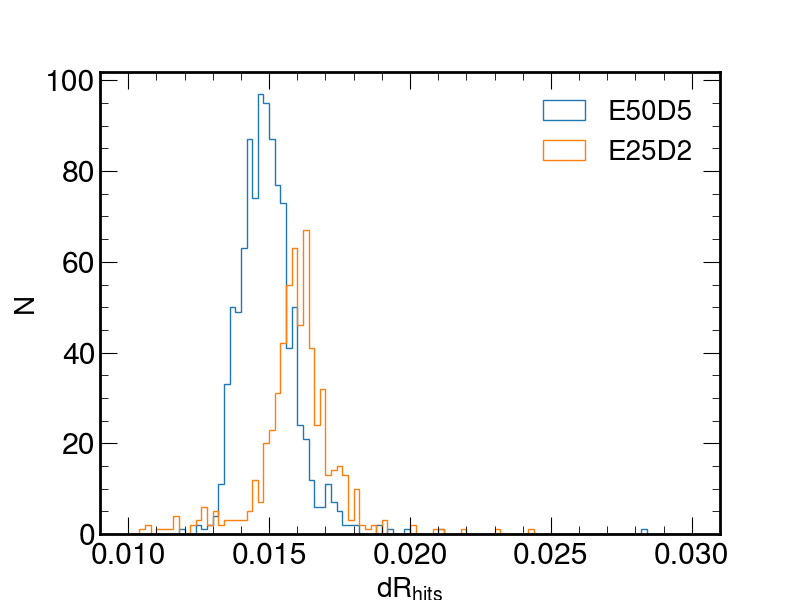

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


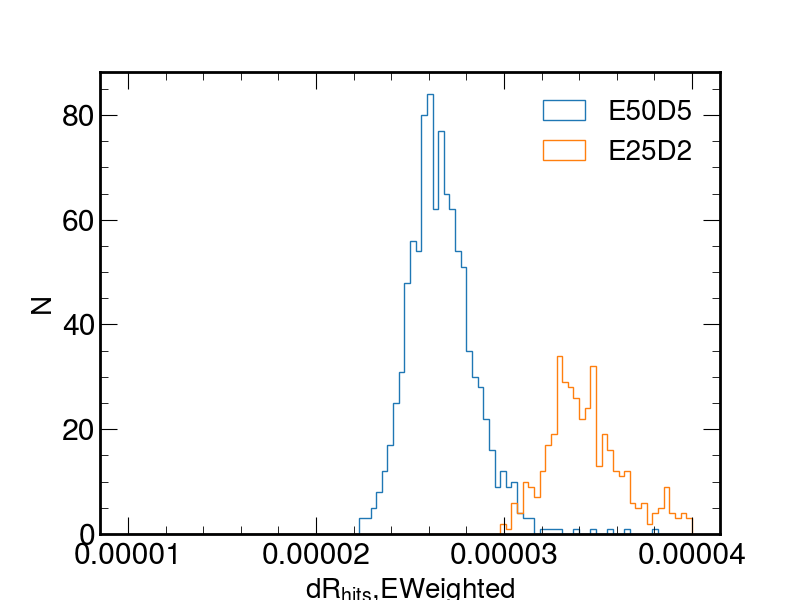

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


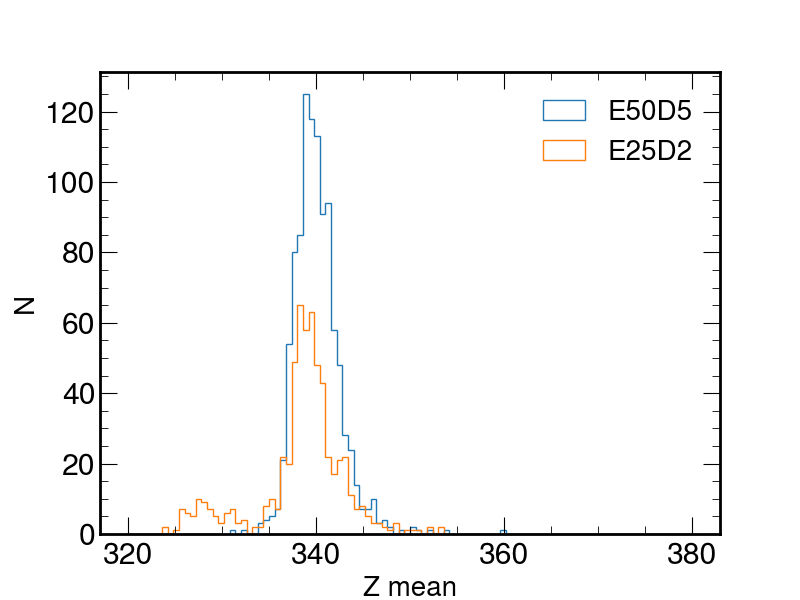

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


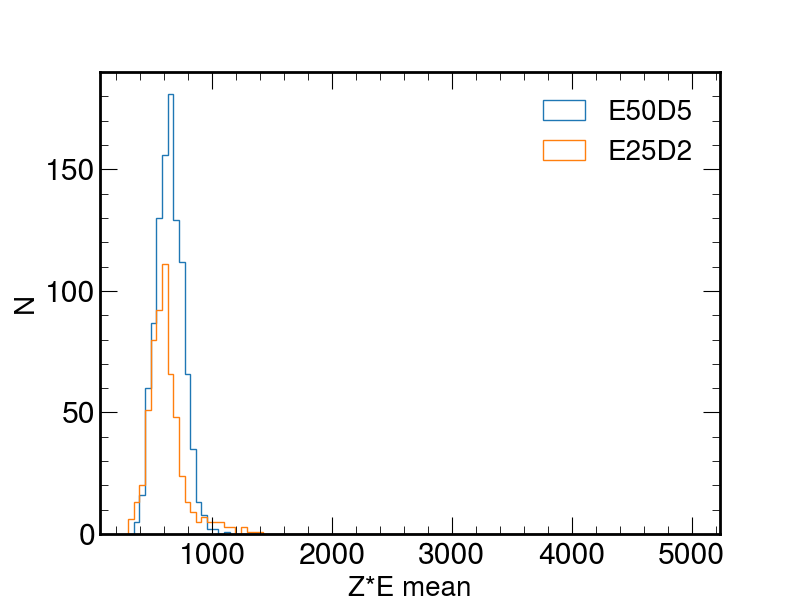

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


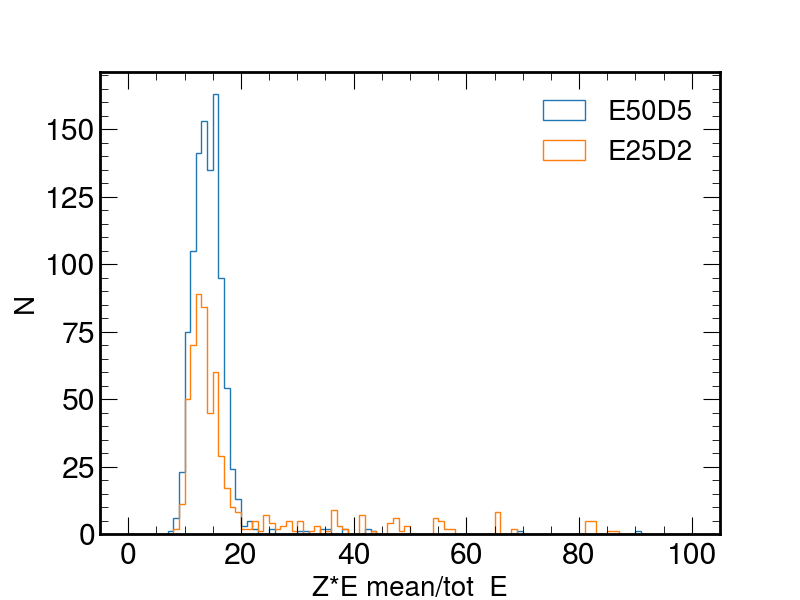

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


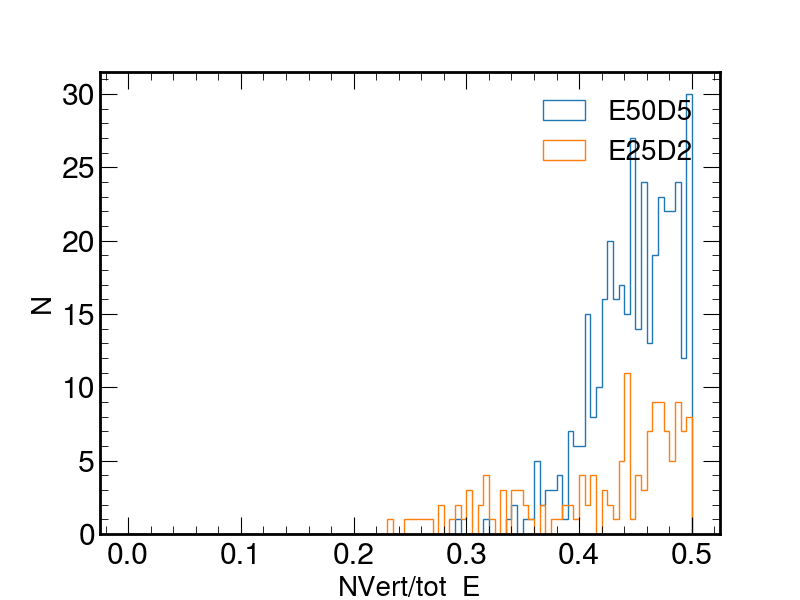

In [15]:
showerShapes=np.asarray([showerShapesE50D5,showerShapesE25D2])
labels=["E50D5","E25D2"]
plotShowerShapes(showerShapes,labels,"E50D5vsE25D2")

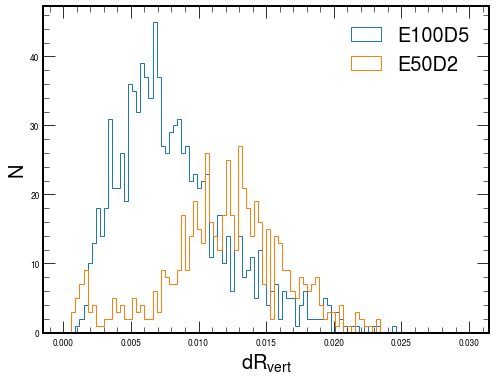

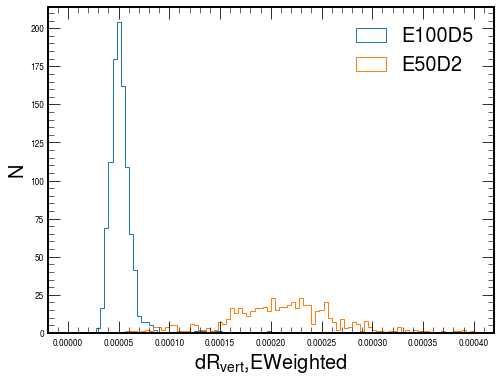

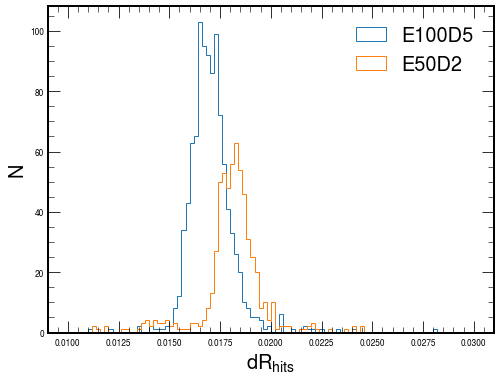

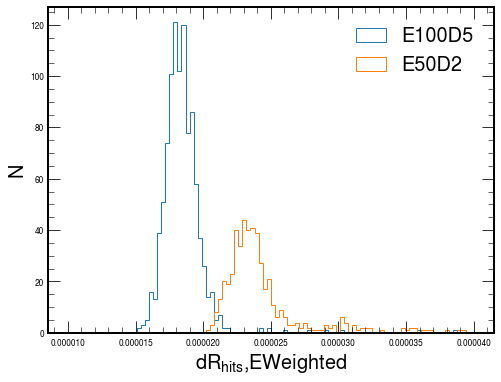

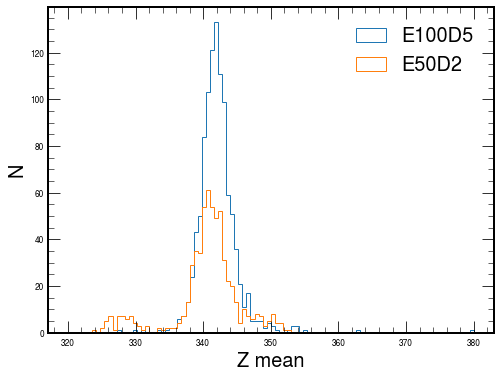

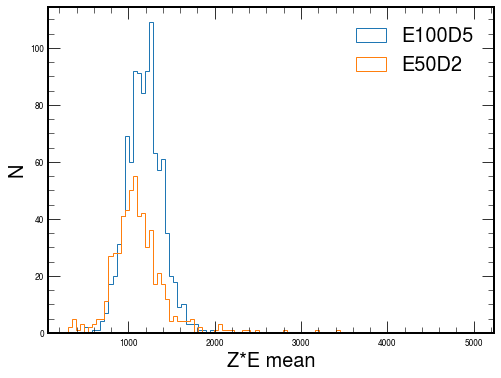

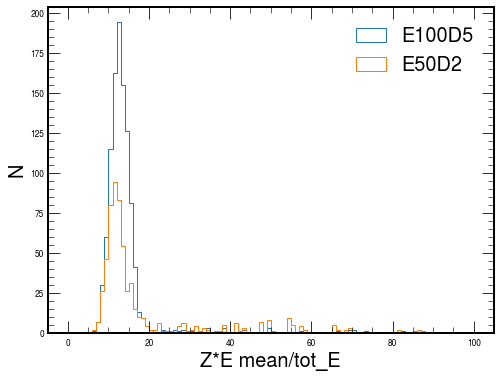

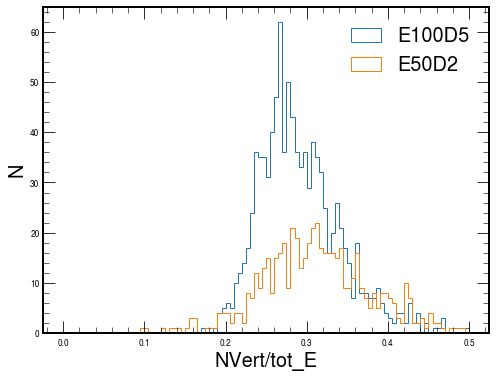

In [16]:
%matplotlib inline
showerShapes=np.asarray([showerShapesE100D5,showerShapesE50D2])
labels=["E100D5","E50D2"]
plotShowerShapes(showerShapes,labels,"E100D5vsE50D2")

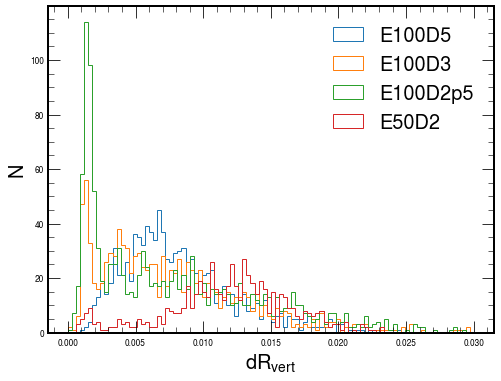

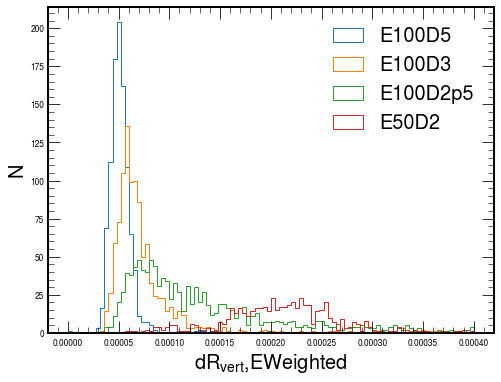

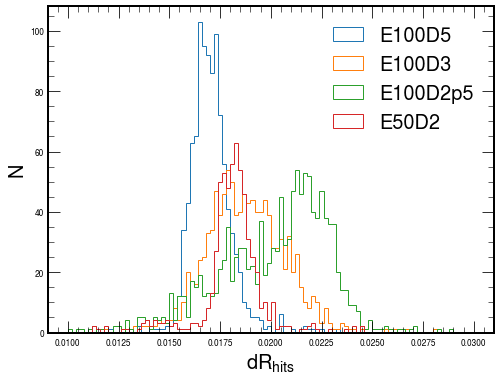

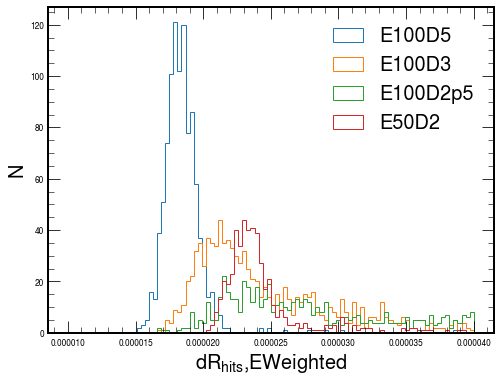

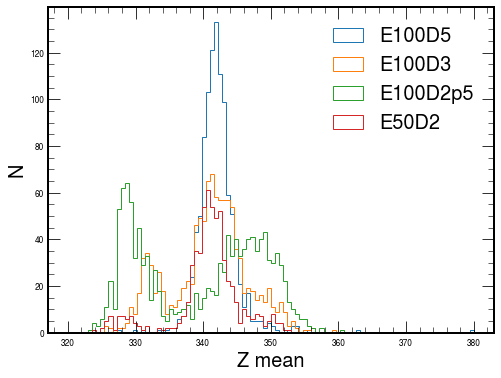

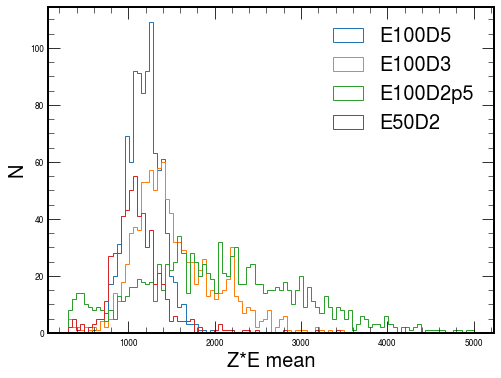

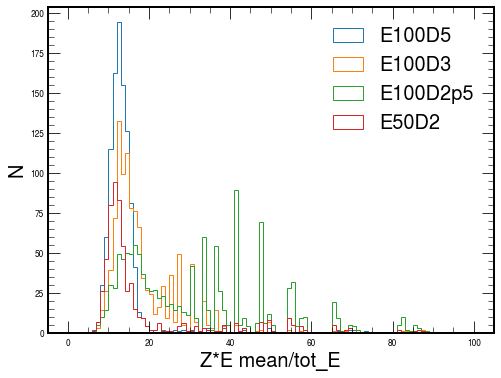

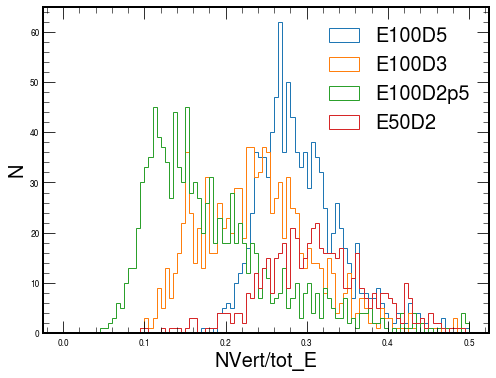

In [18]:
%matplotlib inline
showerShapes=np.asarray([showerShapesE100D5,showerShapesE100D3,showerShapesE100D2p5,showerShapesE50D2])
labels=["E100D5","E100D3","E100D2p5","E50D2"]
plotShowerShapes(showerShapes,labels,"E100D5.3.2p5vsE50D2")